In [250]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv('Combined_WR.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [252]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_avg_depth_of_target', 'weighted_avg_avoided_tackles',
       'weighted_avg_caught_percent', 'weighted_avg_contested_catch_rate',
       'weighted_avg_contested_receptions', 'weighted_avg_contested_targets',
       'weighted_avg_declined_penalties', 'weighted_avg_drop_rate',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_fumbles',
       'weighted_avg_grades_hands_drop', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_route',
       'weighted_avg_inline_rate', 'weighted_avg_interceptions',
       'weighted_avg_longest', 'weighted_avg_pass_block_rate',
       'weighted_avg_pass_blocks', 'weighted_avg_pass_plays',
       'weighted_avg_penalties', 'weighted

In [253]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [254]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())

      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       WR         5.419766        331.370639         17.0   
50   49ers  2020       WR         4.631685        605.449663         24.0   
70   49ers  2021       WR         4.416438        315.748468         18.0   
123  49ers  2022       WR         6.700288        253.620355         26.0   
12   Bears  2019       WR        15.531350        186.577541         20.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         24.0     63.513776    69.554946     27.90%  ...   
50         18.0     69.554946    71.292028      5.40%  ...   
70         26.0     71.292028    74.381042     19.50%  ...   
123        26.0     74.381042    73.373080     27.60%  ...   
12         22.0     67.241234    67.376749     -2.10%  ...   

     Previous_slot_rate  Previous_targeted_qb_rating  Previous_targets  \
17            36.339349                    92.858737         42.852679   
50            35

In [255]:
team_data = df.groupby('Team')
print(team_data.head)

<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000020800BBBF10>>


In [256]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_grades_offense','Previous_grades_pass_route', 'Previous_yards_per_reception',
                                         'Previous_yprr', 'Previous_yards_after_catch', 'Previous_touchdowns', 
                                         'Value_cap_space', 'Previous_PFF']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")

Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [257]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[ 63.51377551  63.43214286  13.30165816   1.35492347 139.27487245
     2.98469388   5.41976621  63.51377551]
  [ 69.55494568  69.28238994  13.63058891   1.54209262 221.24413951
     3.40194397   4.63168517  69.55494568]
  [ 71.29202762  71.64143126  12.78656623   1.53842436 226.54111739
     2.29190207   4.41643836  71.29202762]]

 [[ 67.24123396  68.1879047   12.27434331   1.38183873 180.89737324
     3.54551008  15.53134963  67.24123396]
  [ 67.37674887  67.55777554  11.50050327   1.33092602 170.07800705
     3.64116759  12.47729566  67.37674887]
  [ 71.275       70.65607375  10.73579176   1.39550434 225.51789588
     3.76626898  11.41917808  71.275     ]]

 [[ 68.01632426  68.48956135  11.99367018   1.37565242 177.22265408
     4.7901166    6.89691817  68.01632426]
  [ 67.35106278  66.5402867   12.8393475    1.45240237 225.59218982
     2.29065744  15.58526741  67.35106278]
  [ 69.56997041  70.53925049  11.4683925    1.41608974 203.85946746
     3.21893491  10.85479452  69.5699704

In [258]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [259]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

In [260]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [261]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 4734.5728 - val_loss: 4435.2407
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4434.9146 - val_loss: 4262.1880
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4345.9844 - val_loss: 4108.9946
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4230.4937 - val_loss: 3946.7502
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4032.5979 - val_loss: 3762.5027


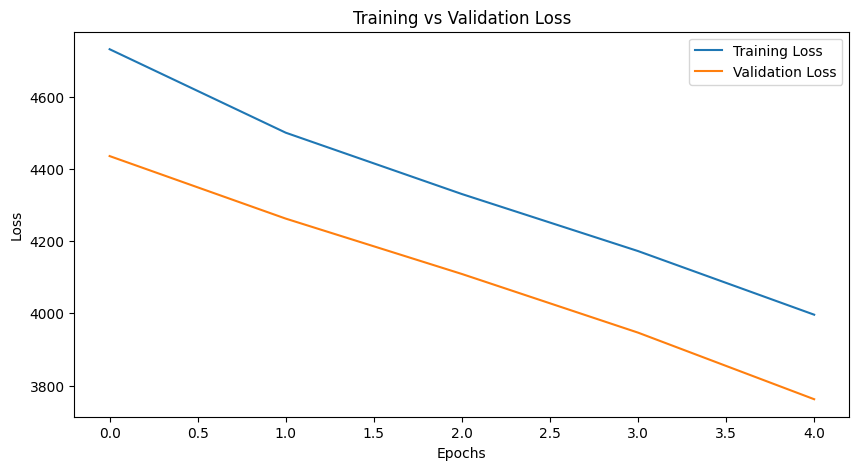

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
R² Score: -243.8870


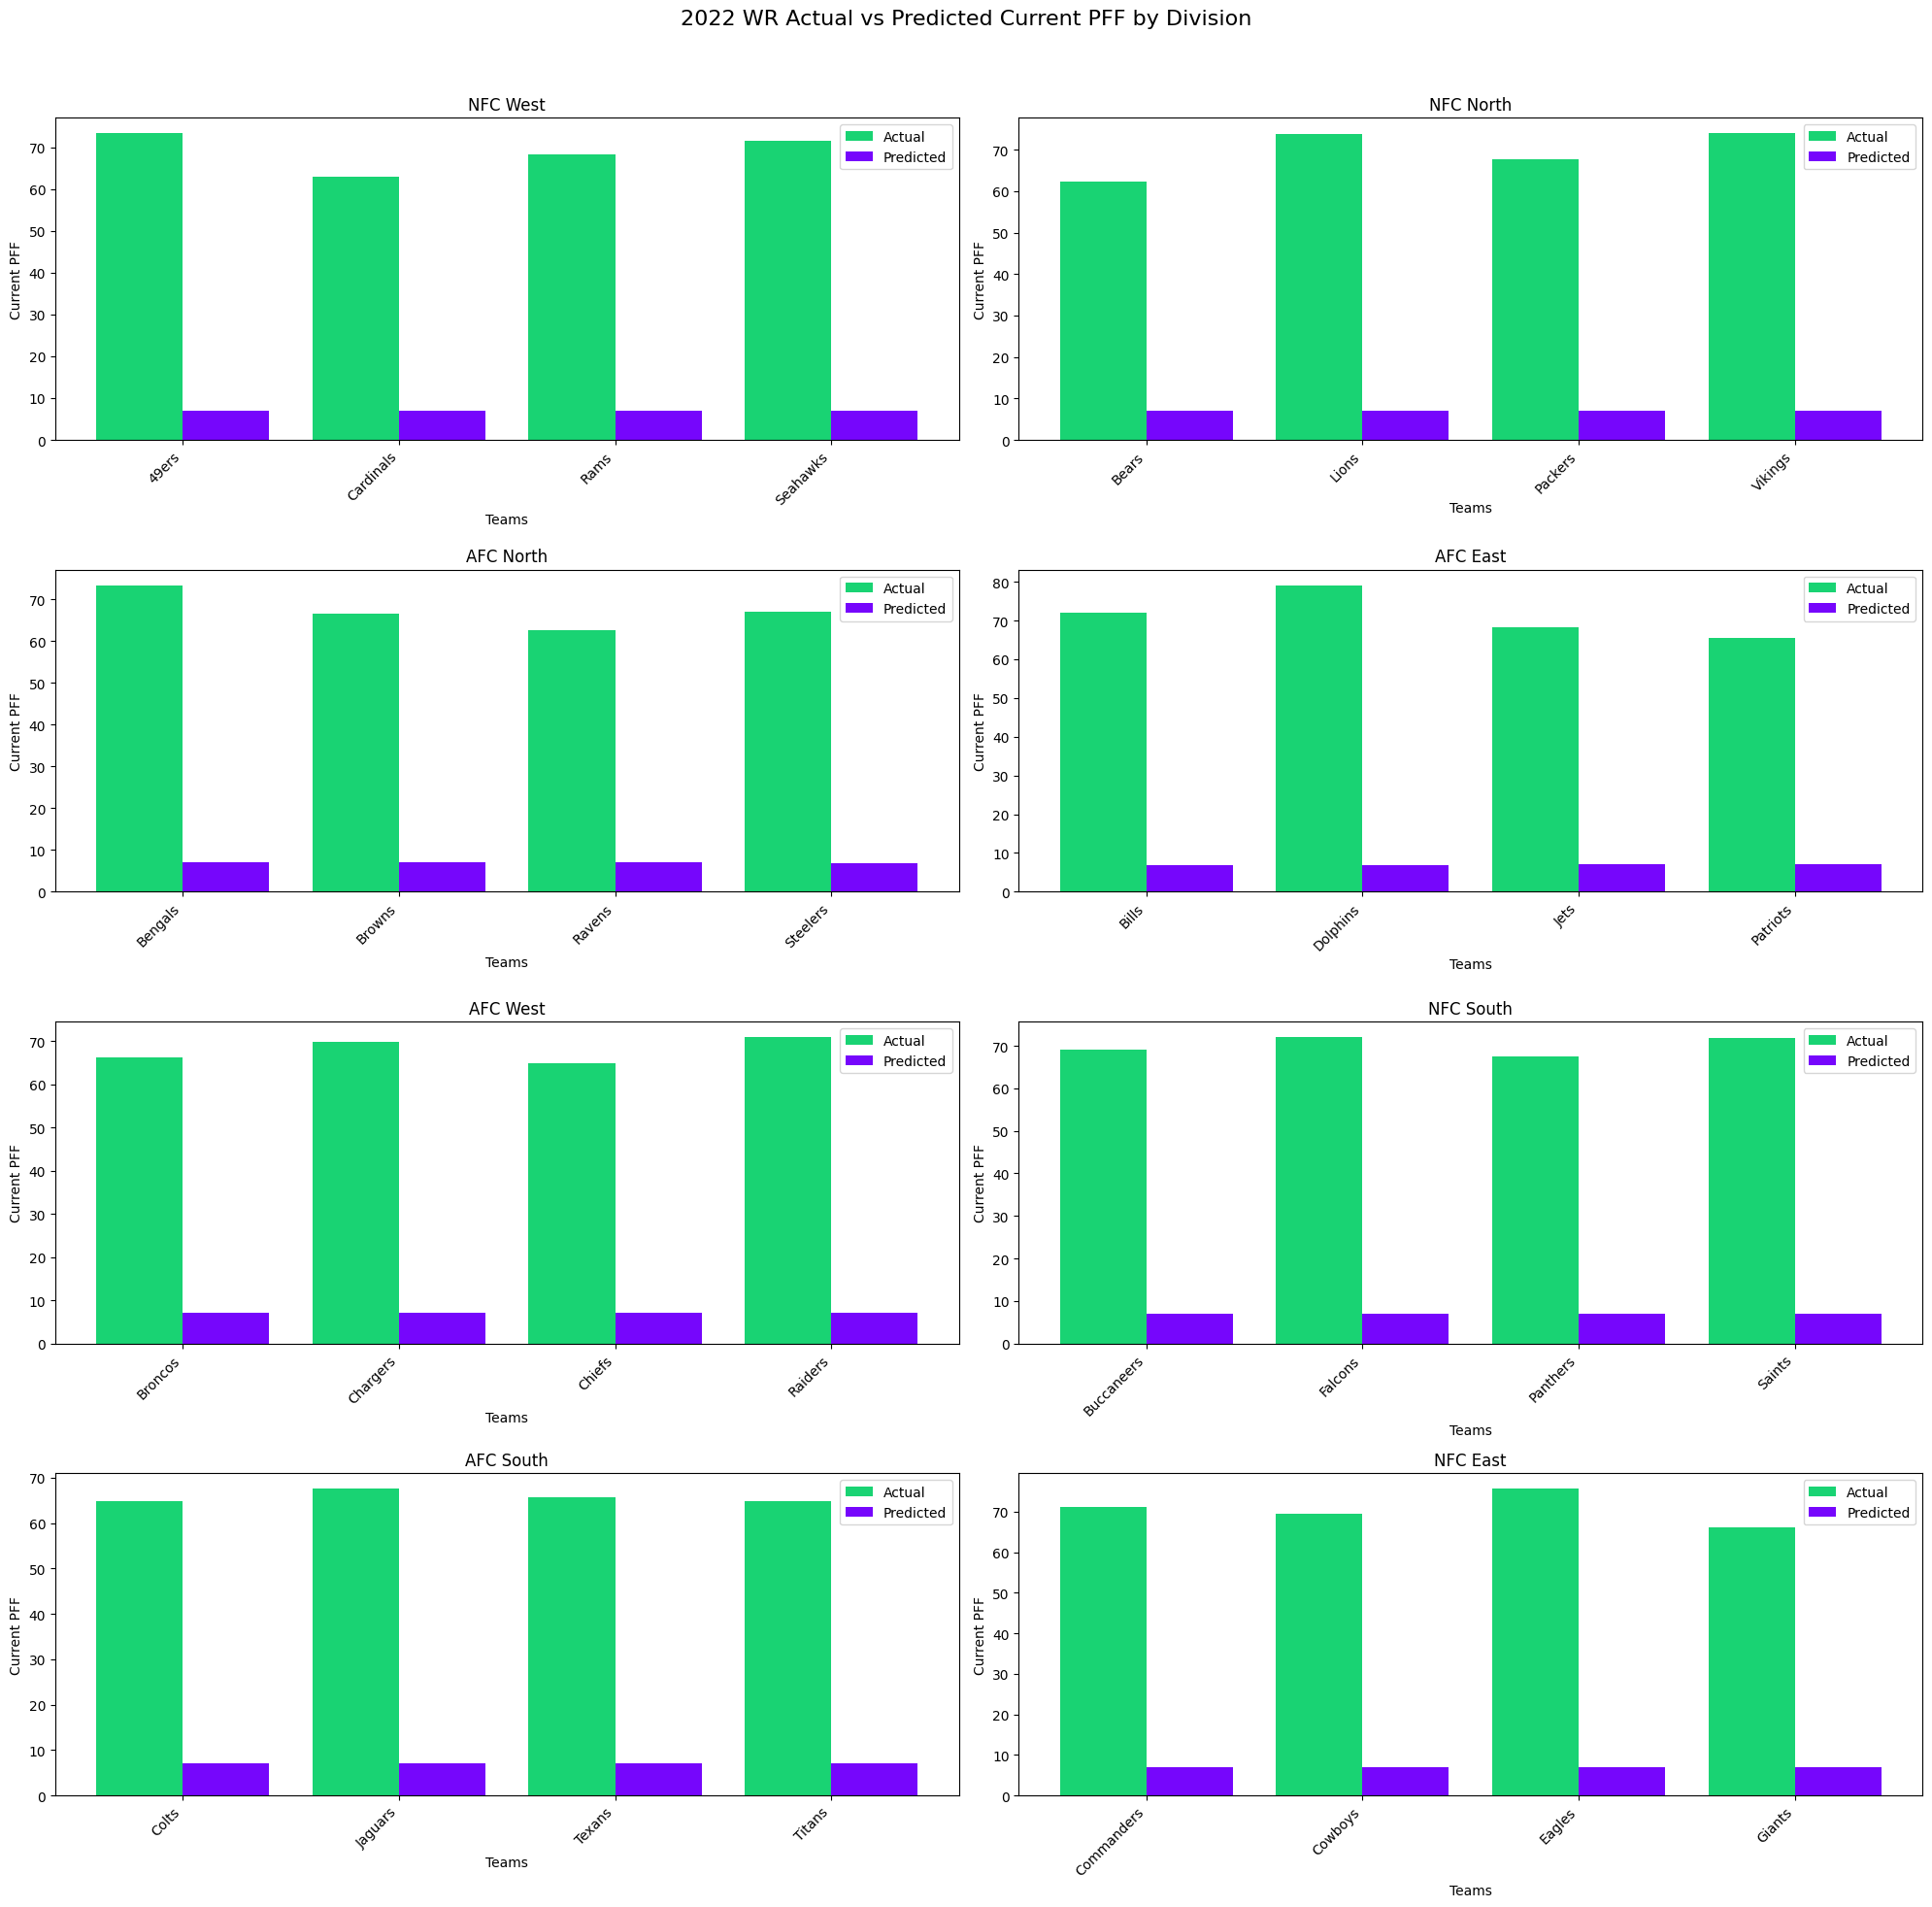

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3807.5859 - val_loss: 3558.9436
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3691.4153 - val_loss: 3338.2029
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3444.6111 - val_loss: 3093.4441
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3269.5530 - val_loss: 2811.5723
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2850.6101 - val_loss: 2494.6147
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2406.1418 - val_loss: 2136.9272
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2103.7080 - val_loss: 1748.7070
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1703.4042 - val_loss: 1337.3229
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1466.2858 - val_loss: 928.5718
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1012.3399 - val_loss: 558.1151


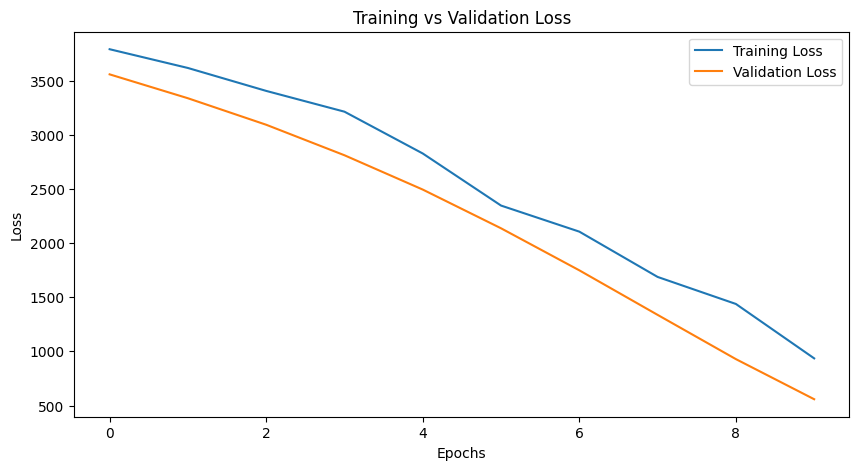

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
R² Score: -36.6509


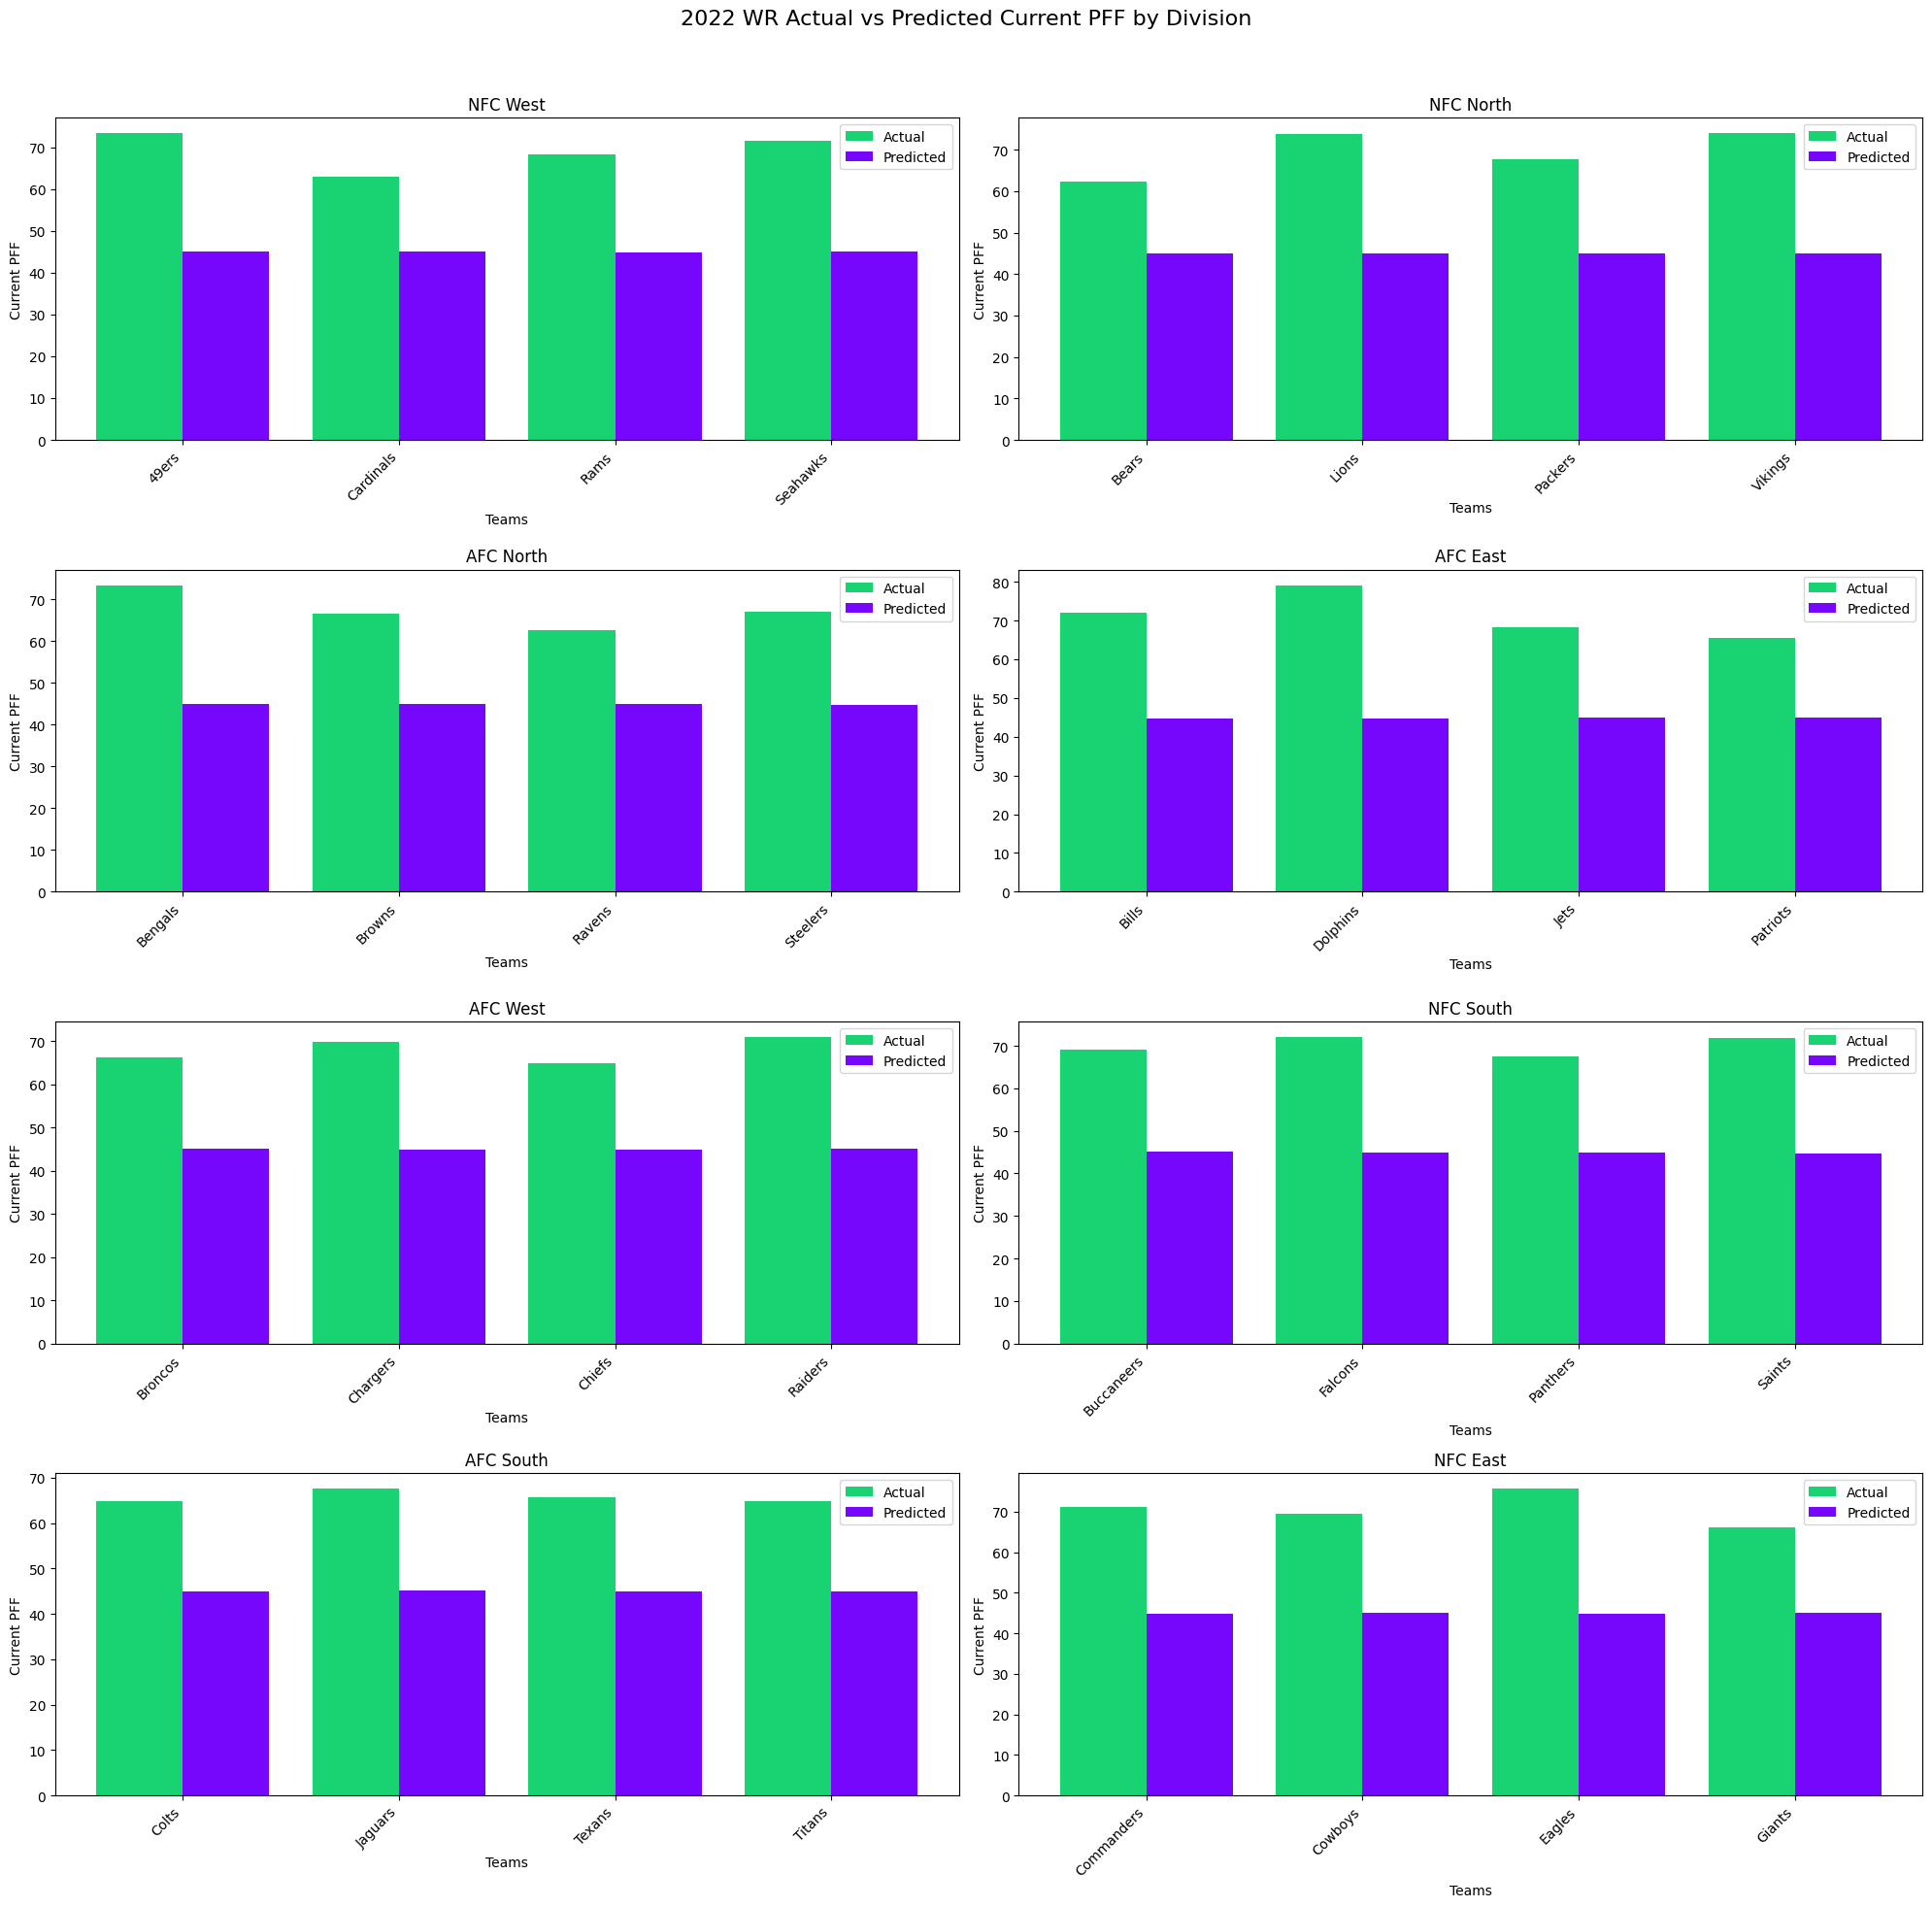

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 606.9642 - val_loss: 259.7637
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 235.7722 - val_loss: 72.9951
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 109.7598 - val_loss: 15.7769
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 200.3490 - val_loss: 53.4611
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 114.1735 - val_loss: 86.1931
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 203.2938 - val_loss: 63.3869
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 126.0340 - val_loss: 41.0243
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 161.5459 - val_loss: 24.8203
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 118.0975 - val_loss: 18.2495
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 72.0201 - val_loss: 21.9554
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 84.0060 - val_loss: 24.6590
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - l

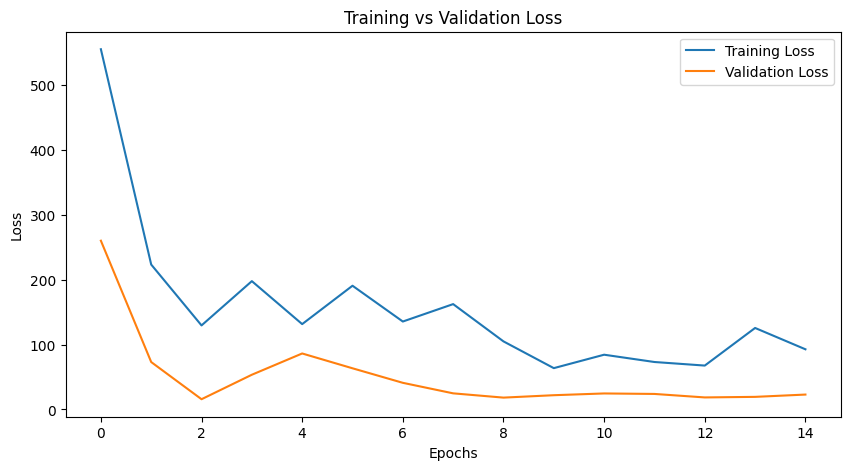

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
R² Score: -0.2284


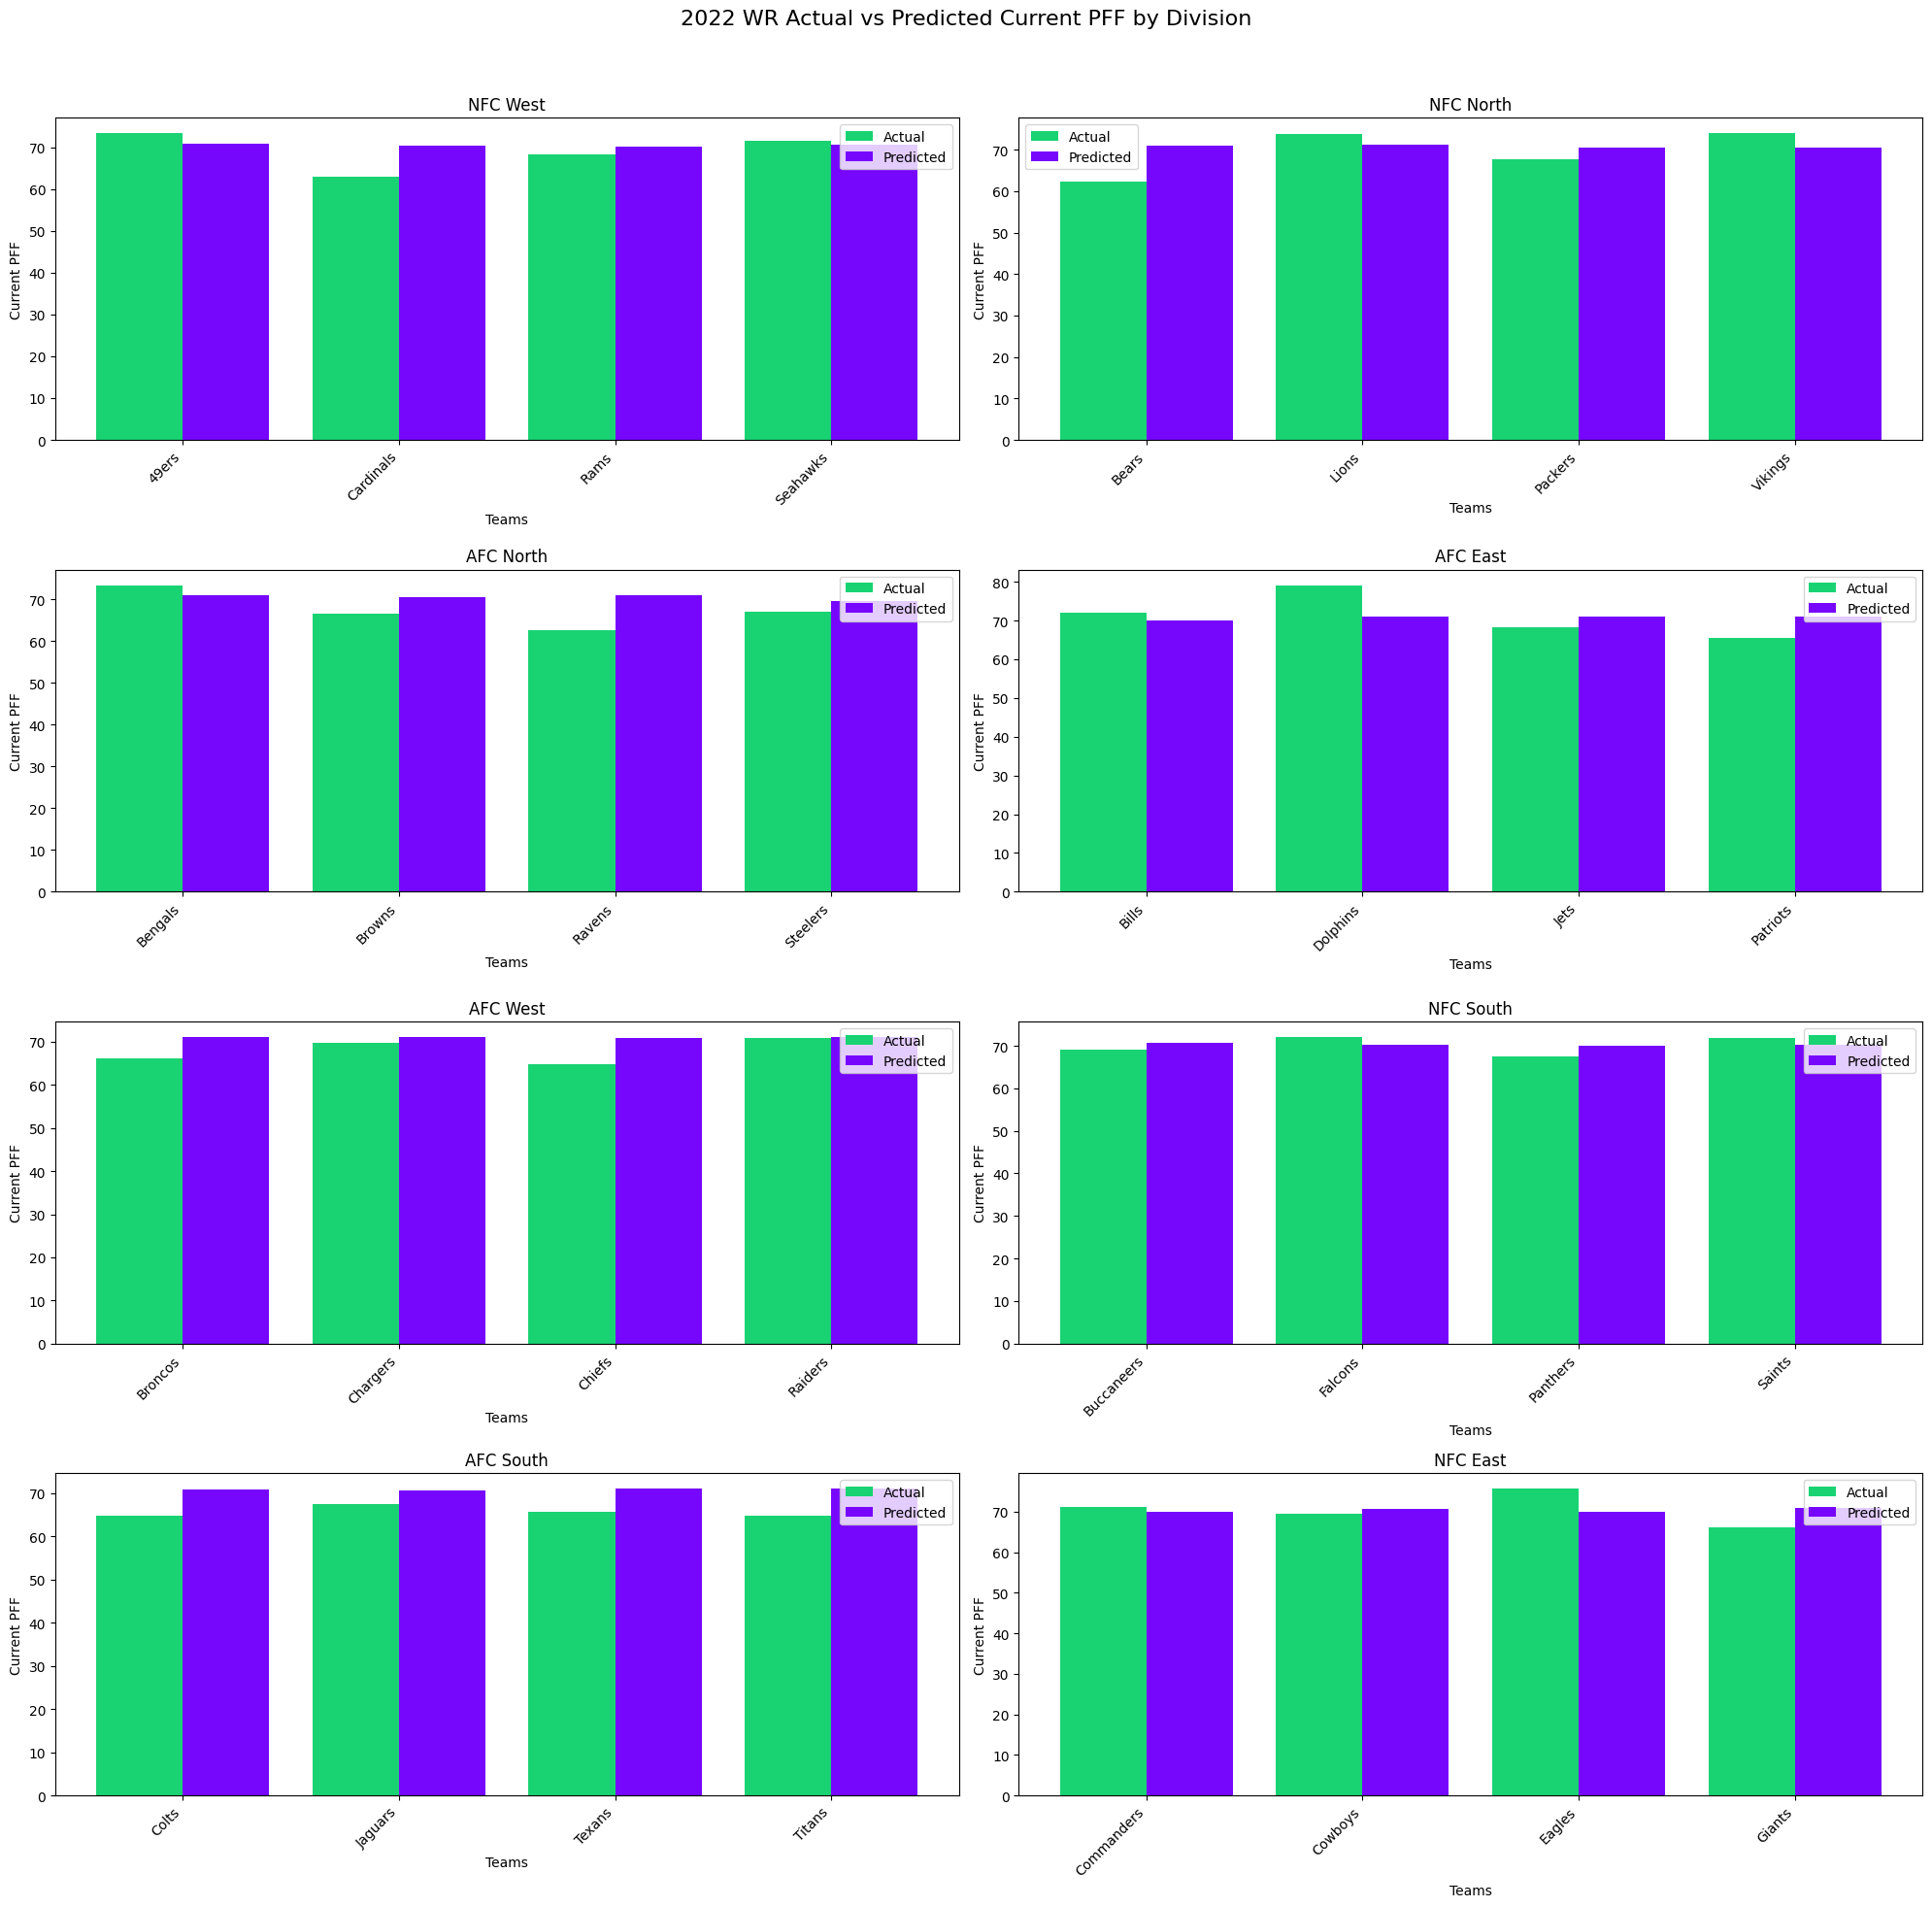

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 106.8322 - val_loss: 26.7324
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 129.6106 - val_loss: 27.2624
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 113.7304 - val_loss: 26.3593
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 80.1918 - val_loss: 22.5879
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 60.5120 - val_loss: 17.9705
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.2225 - val_loss: 18.7151
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 142.3840 - val_loss: 18.9588
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 101.4401 - val_loss: 18.6130
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82.1038 - val_loss: 18.1978
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 71.7037 - val_loss: 18.0890
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 95.6690 - val_loss: 18.1118
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 

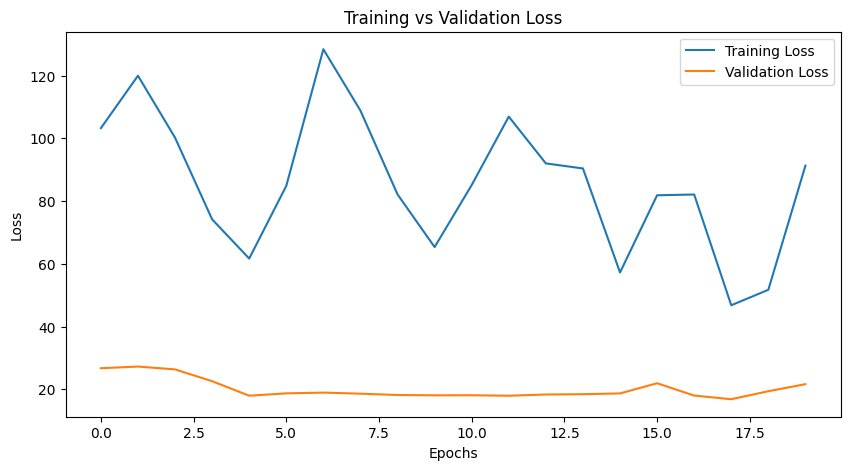

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
R² Score: -0.1740


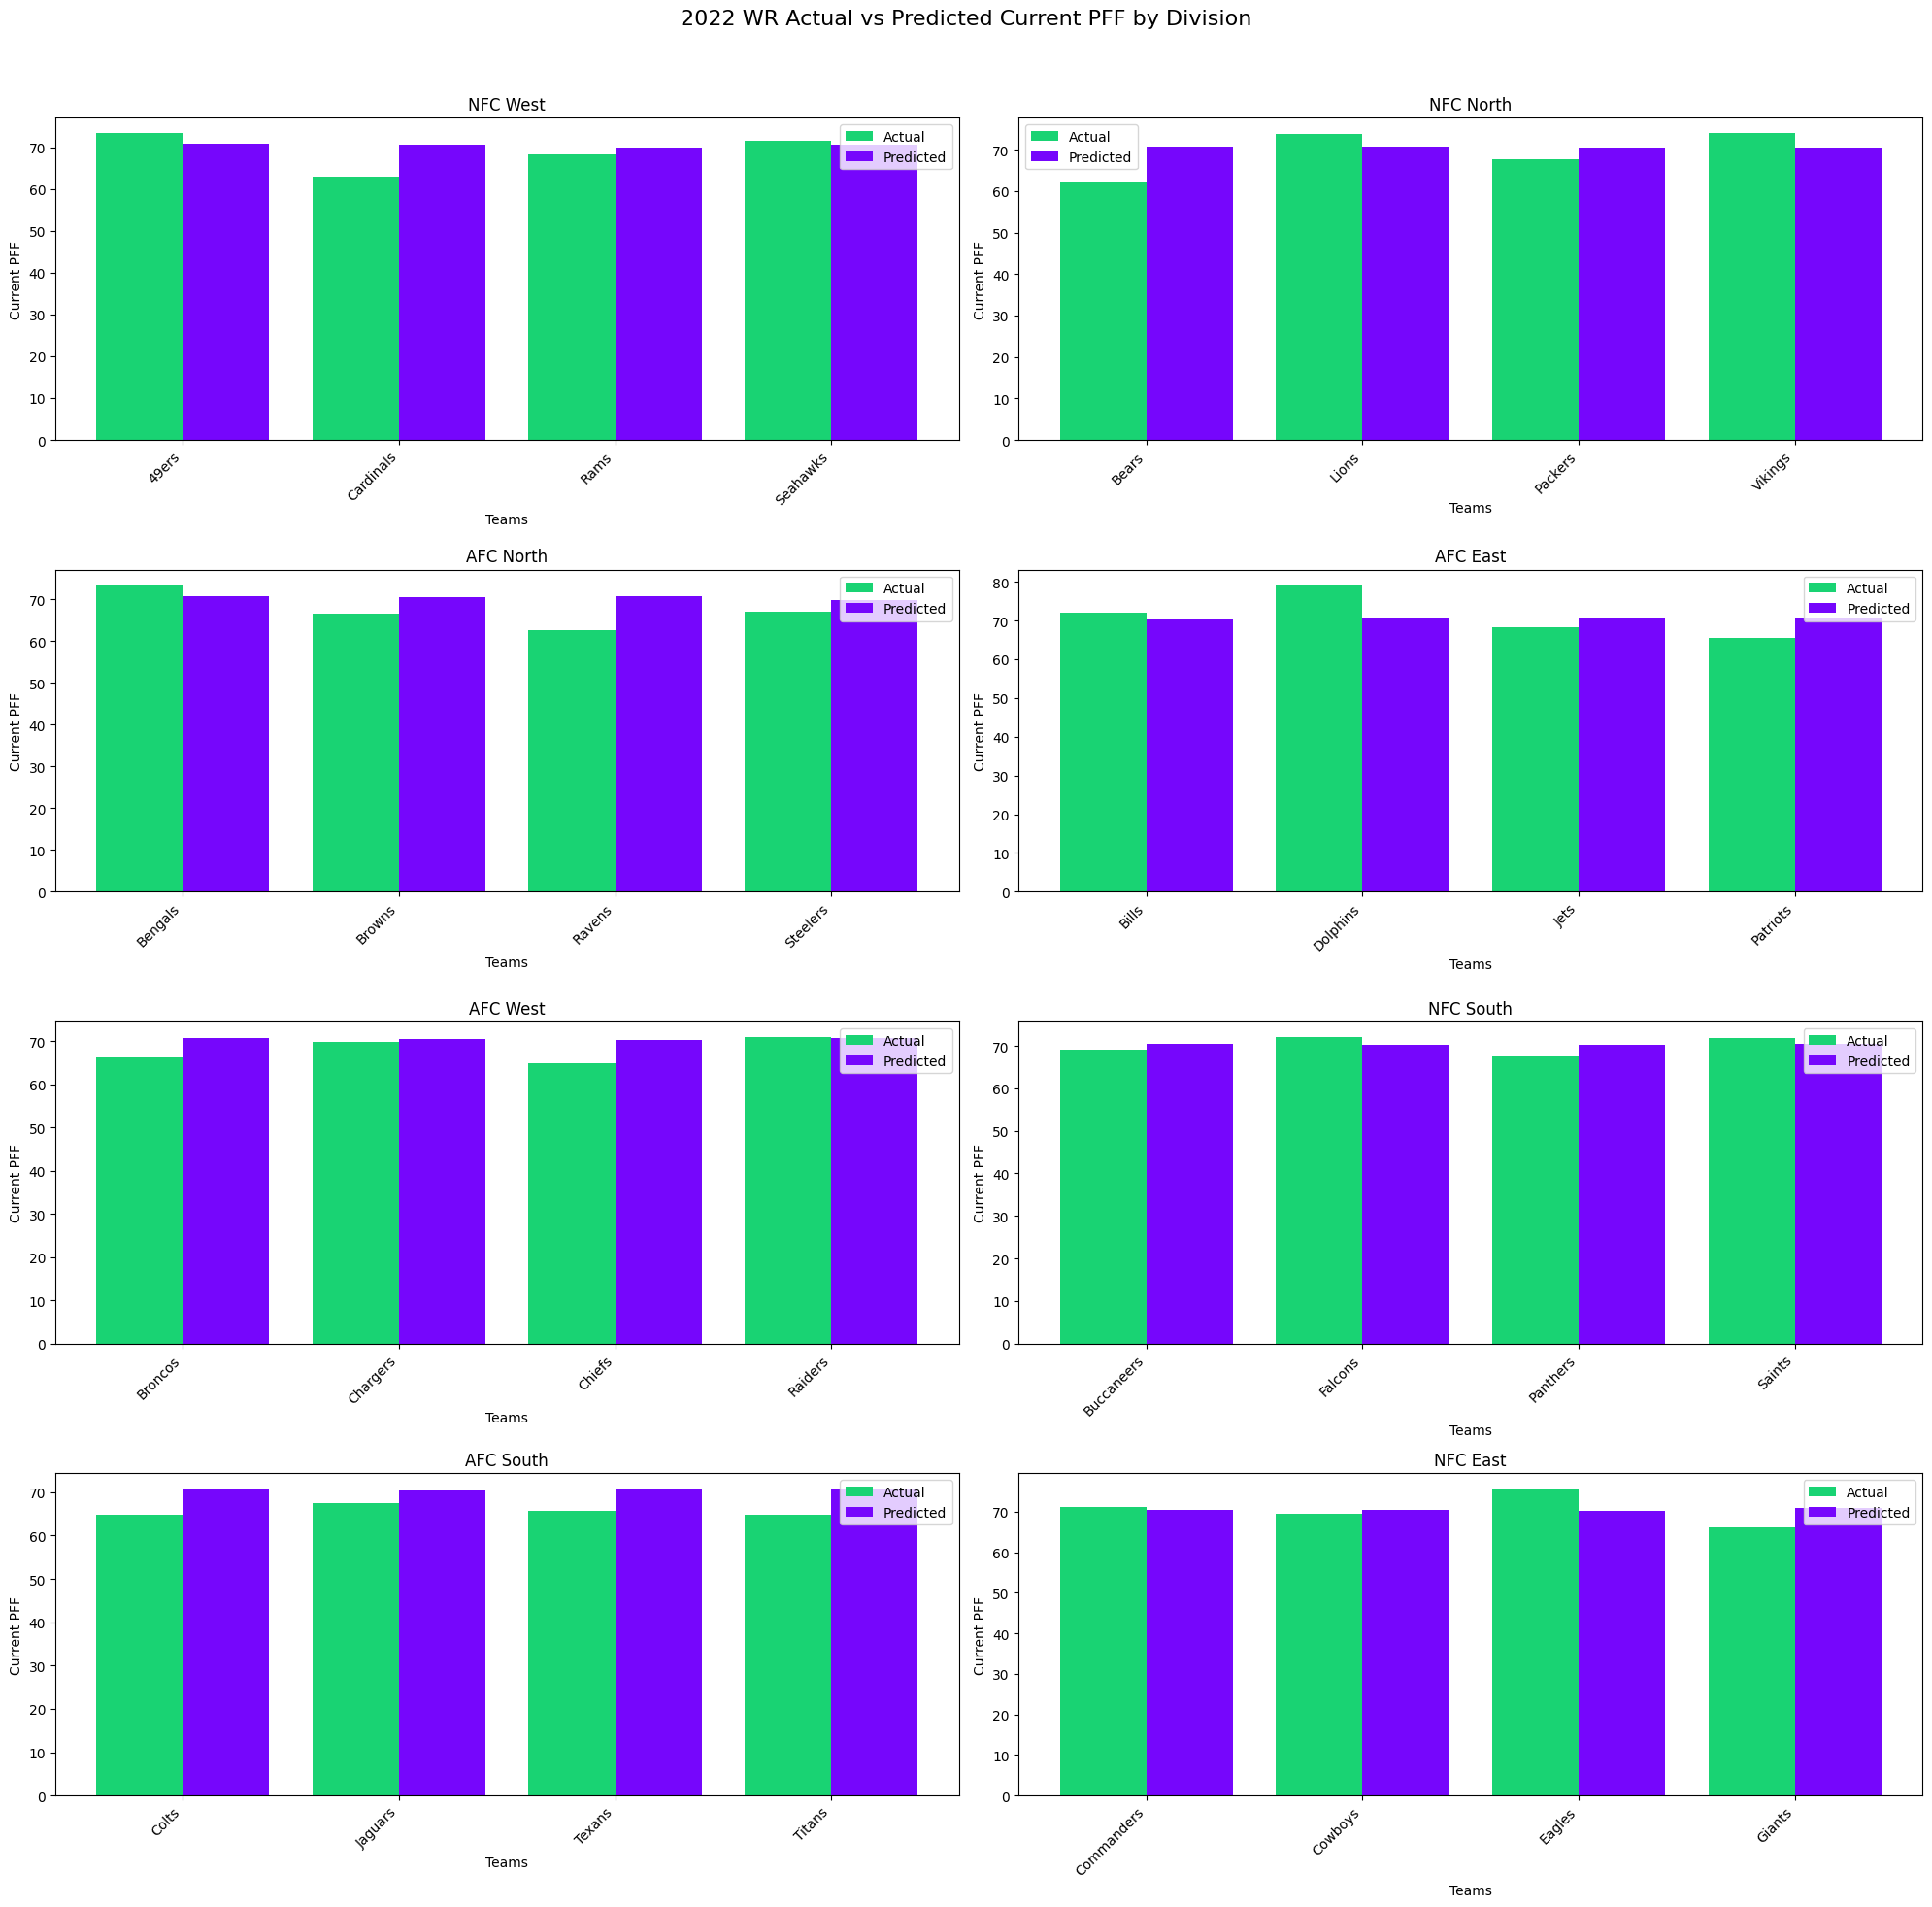

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 37.5993 - val_loss: 23.2982
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 68.0078 - val_loss: 16.5292
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 65.8160 - val_loss: 19.2281
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 203.5155 - val_loss: 24.9984
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 73.5407 - val_loss: 27.6897
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 97.7691 - val_loss: 24.6500
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 47.7799 - val_loss: 22.1297
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 58.4824 - val_loss: 16.9692
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 130.2250 - val_loss: 15.5499
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 83.2532 - val_loss: 20.4921
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 88.5333 - val_loss: 21.9788
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 123

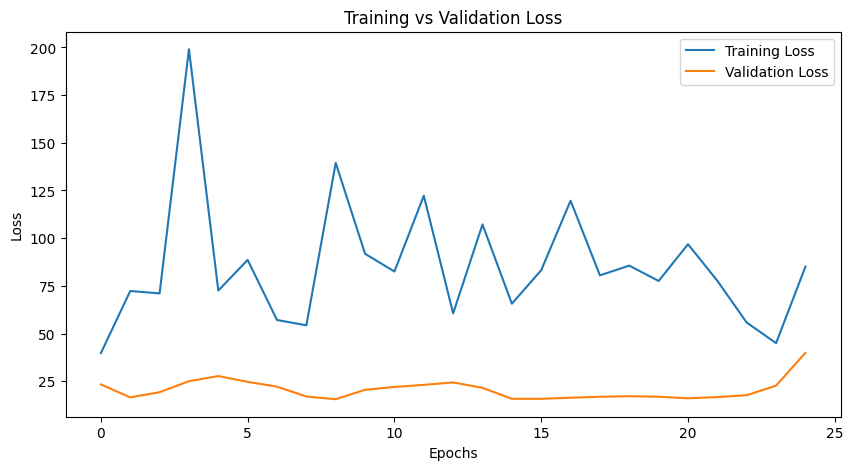

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
R² Score: -1.0874


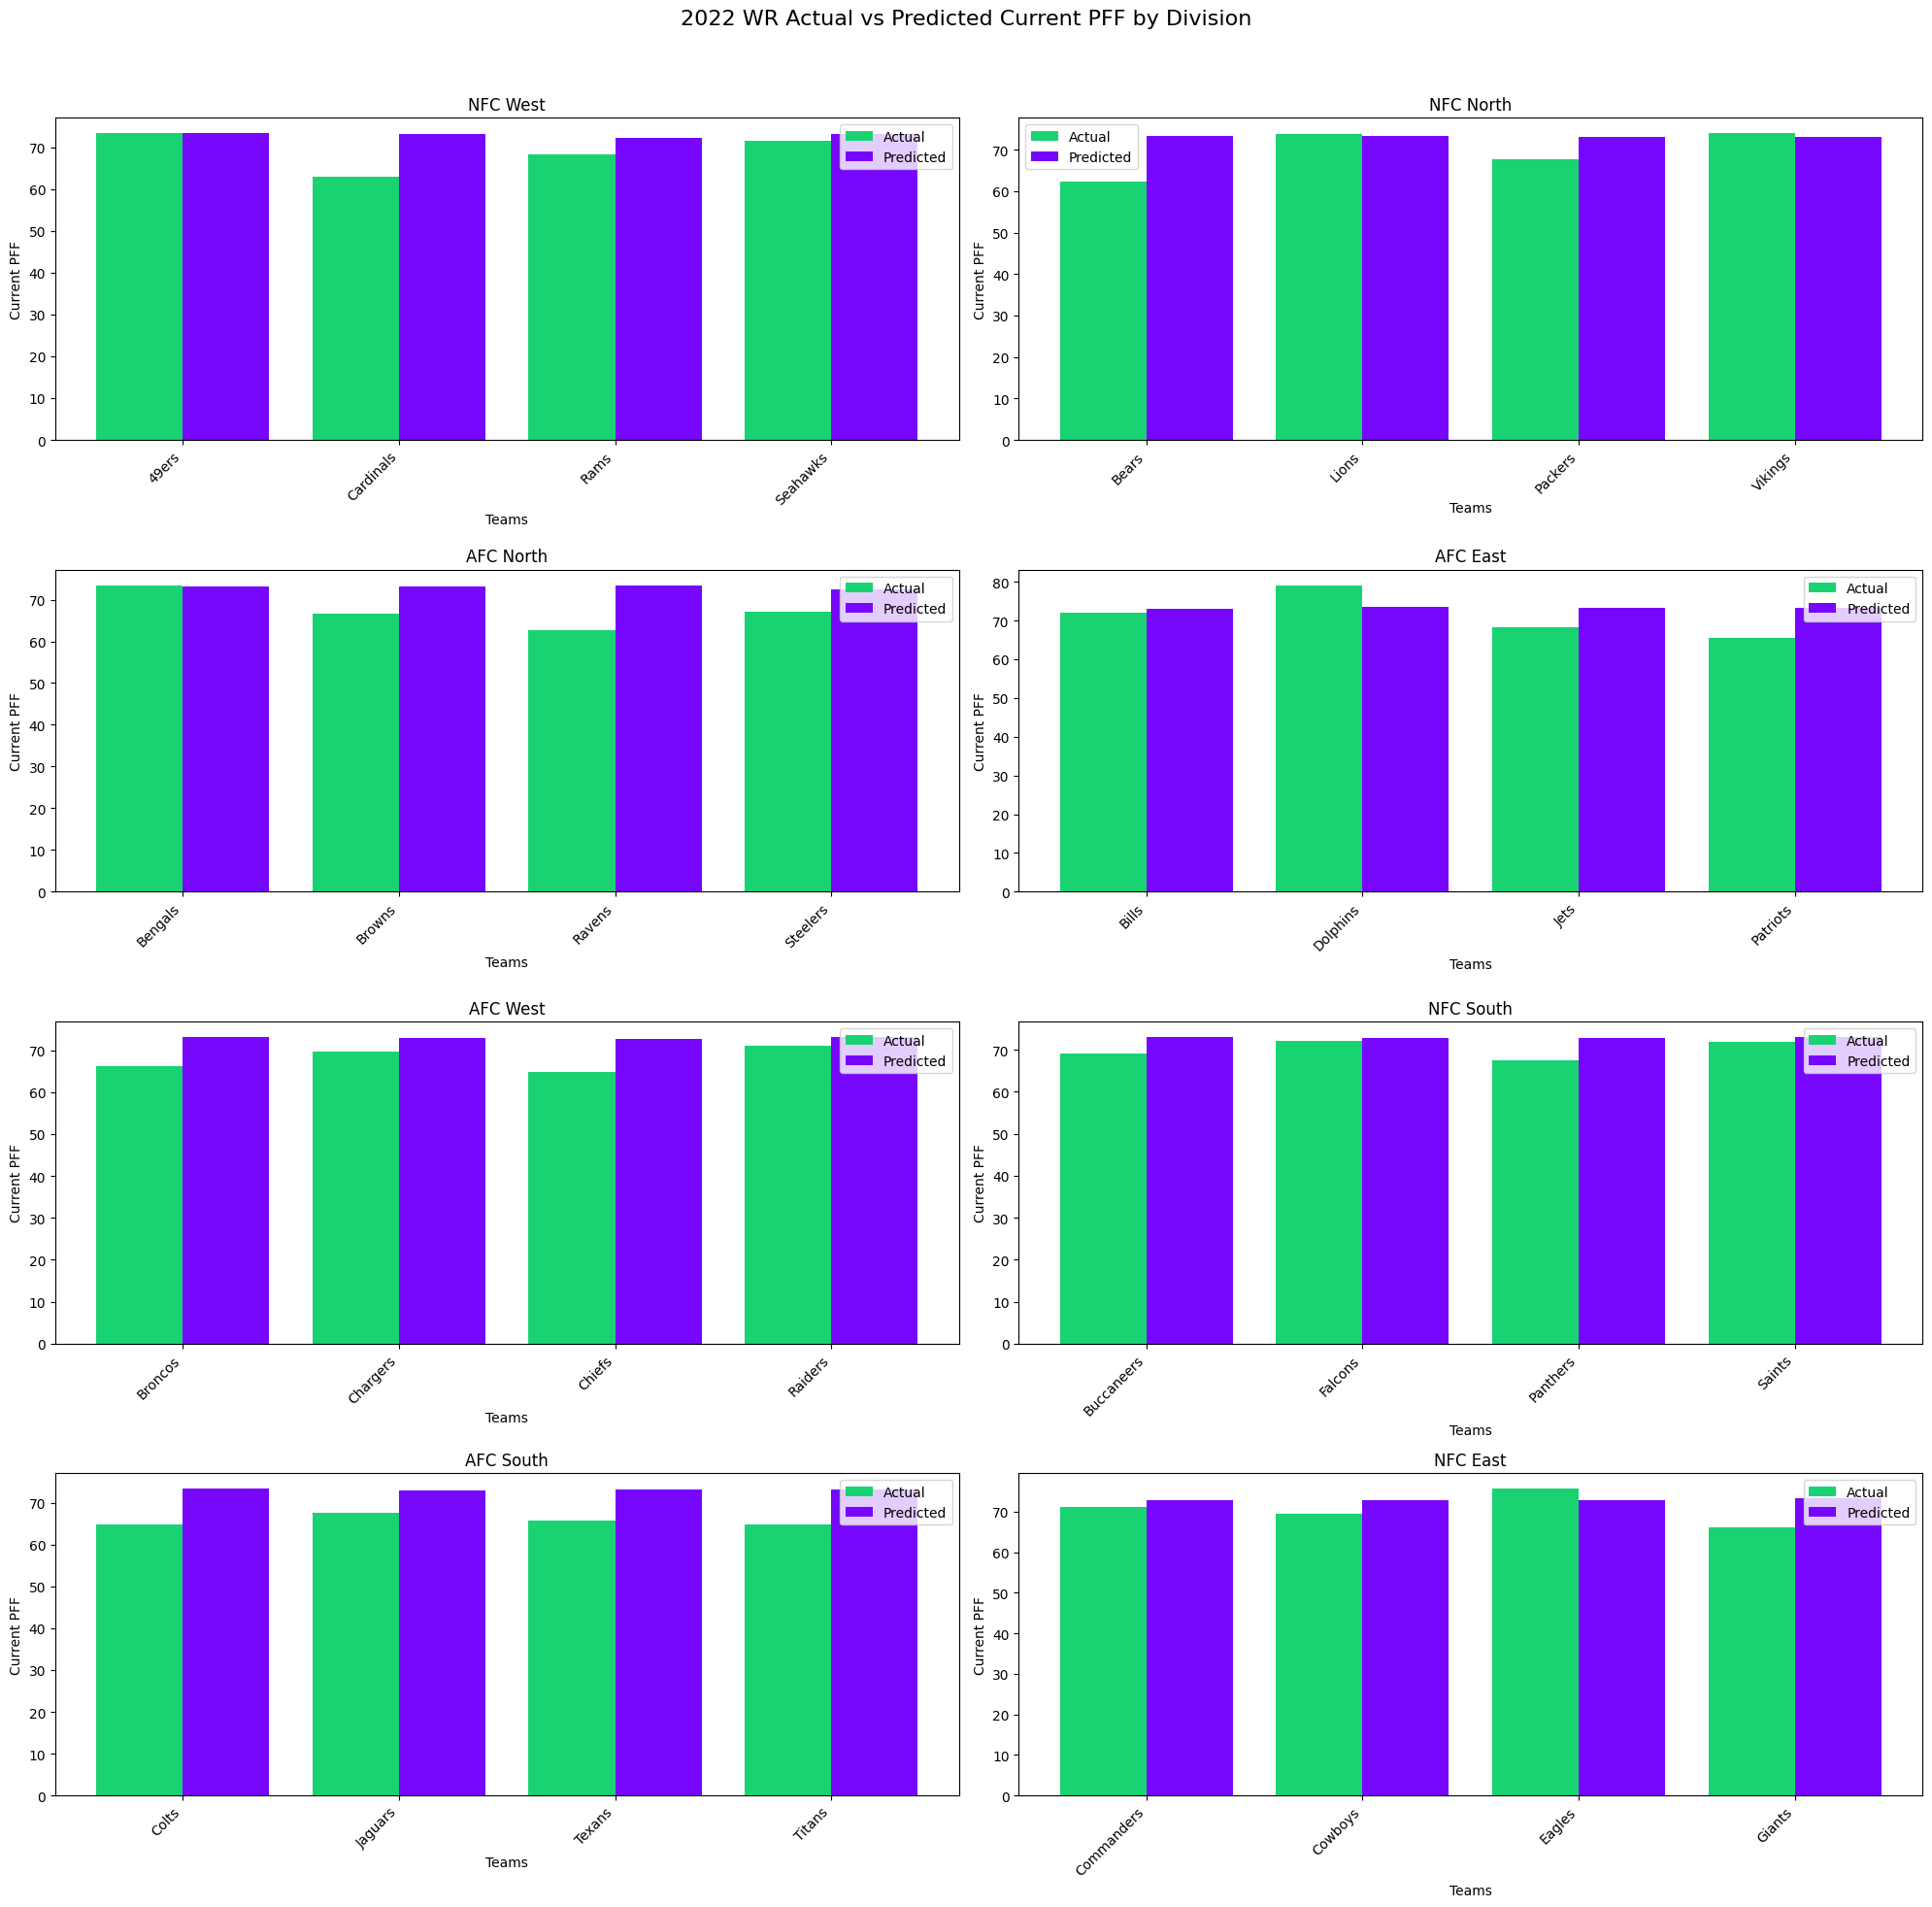

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 126.0419 - val_loss: 40.9765
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 147.5309 - val_loss: 19.1688
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 59.9663 - val_loss: 26.1713
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 77.7940 - val_loss: 41.3605
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 72.9887 - val_loss: 32.6100
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 57.4197 - val_loss: 24.5246
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 71.9313 - val_loss: 19.8873
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 83.3606 - val_loss: 16.1738
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 64.2315 - val_loss: 17.0228
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 120.4522 - val_loss: 18.8526
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 92.2121 - val_loss: 22.3254
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10

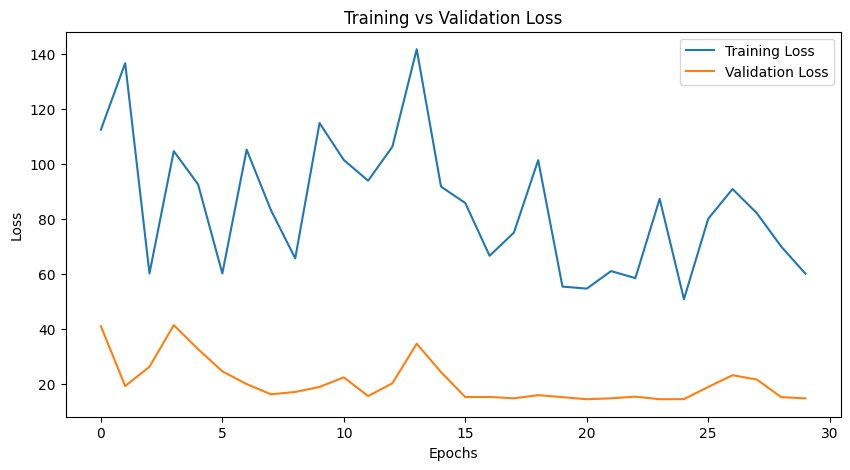

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
R² Score: 0.0511


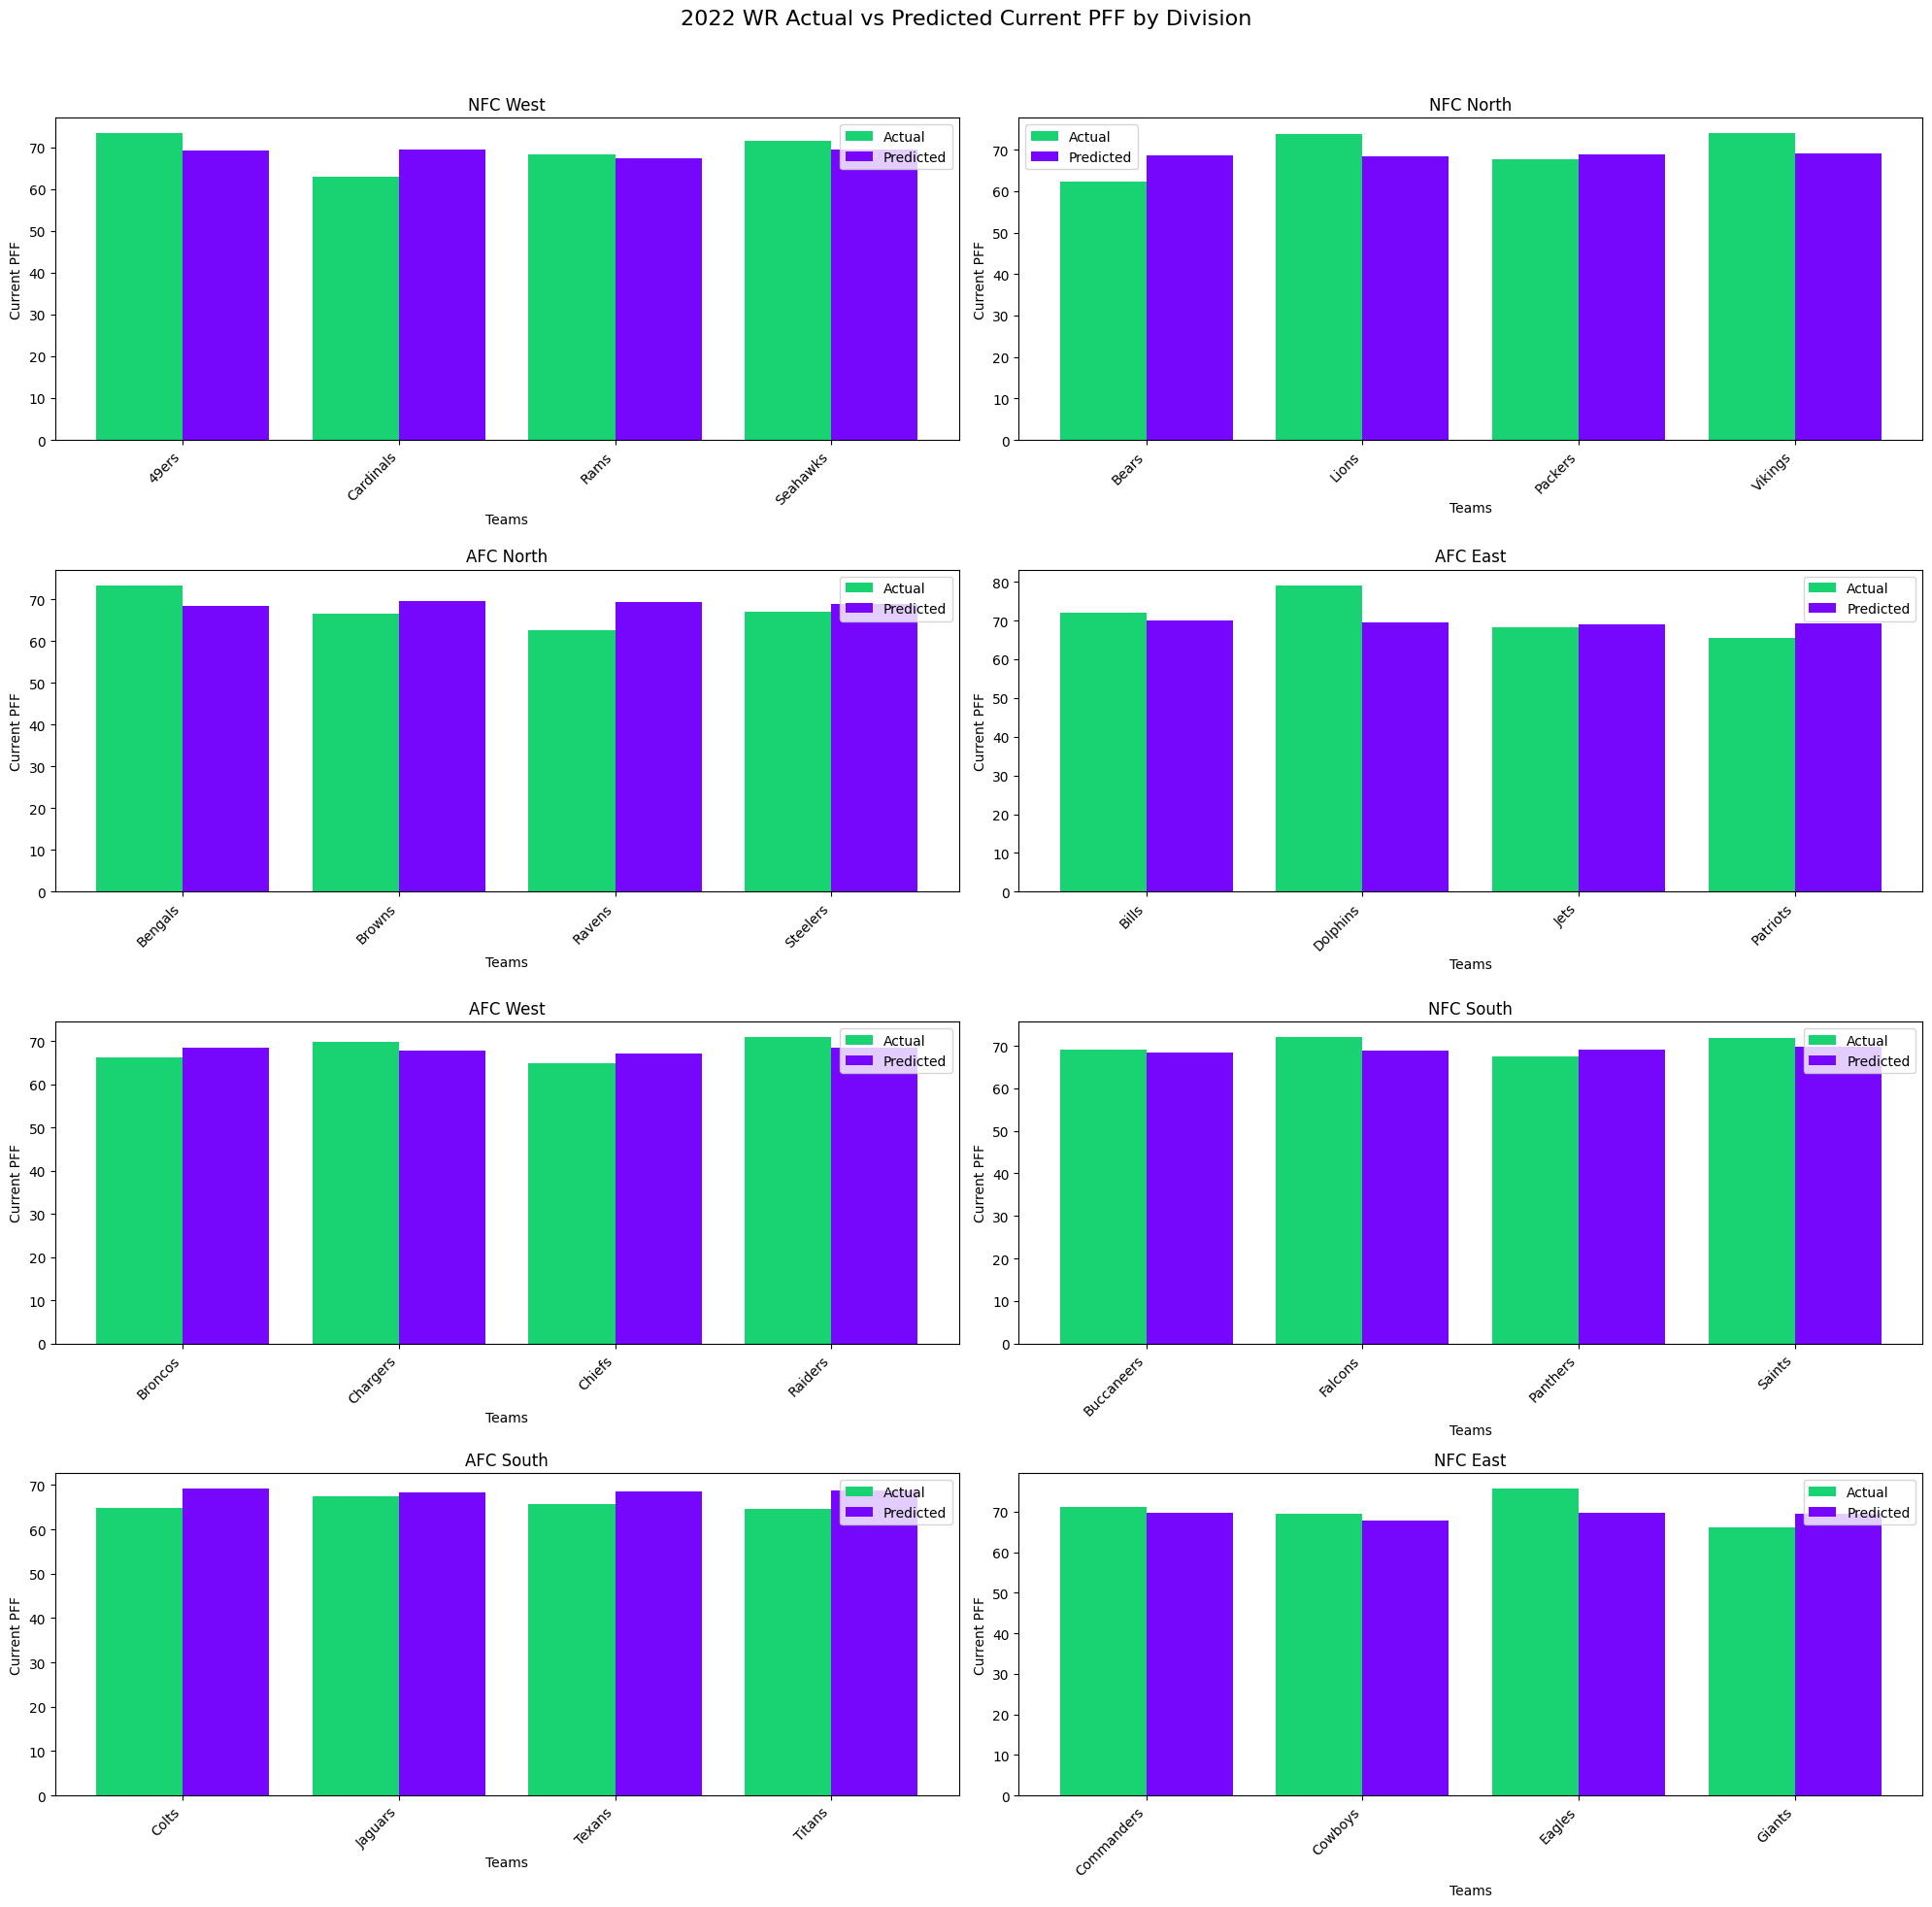

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45.5761 - val_loss: 15.1912
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88.9061 - val_loss: 14.4229
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 82.3326 - val_loss: 16.0526
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 48.8886 - val_loss: 15.4723
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 105.9972 - val_loss: 14.8571
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 84.7288 - val_loss: 14.7426
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 82.9578 - val_loss: 15.5812
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 49.7308 - val_loss: 17.4411
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 56.9197 - val_loss: 15.7476
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 81.1285 - val_loss: 15.6003
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 26.6413 - val_loss: 21.7977
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 84.4

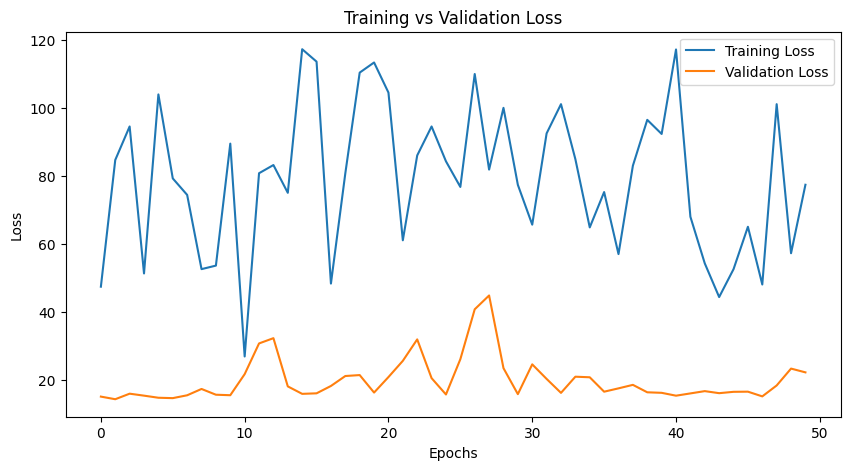

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
R² Score: -0.7702


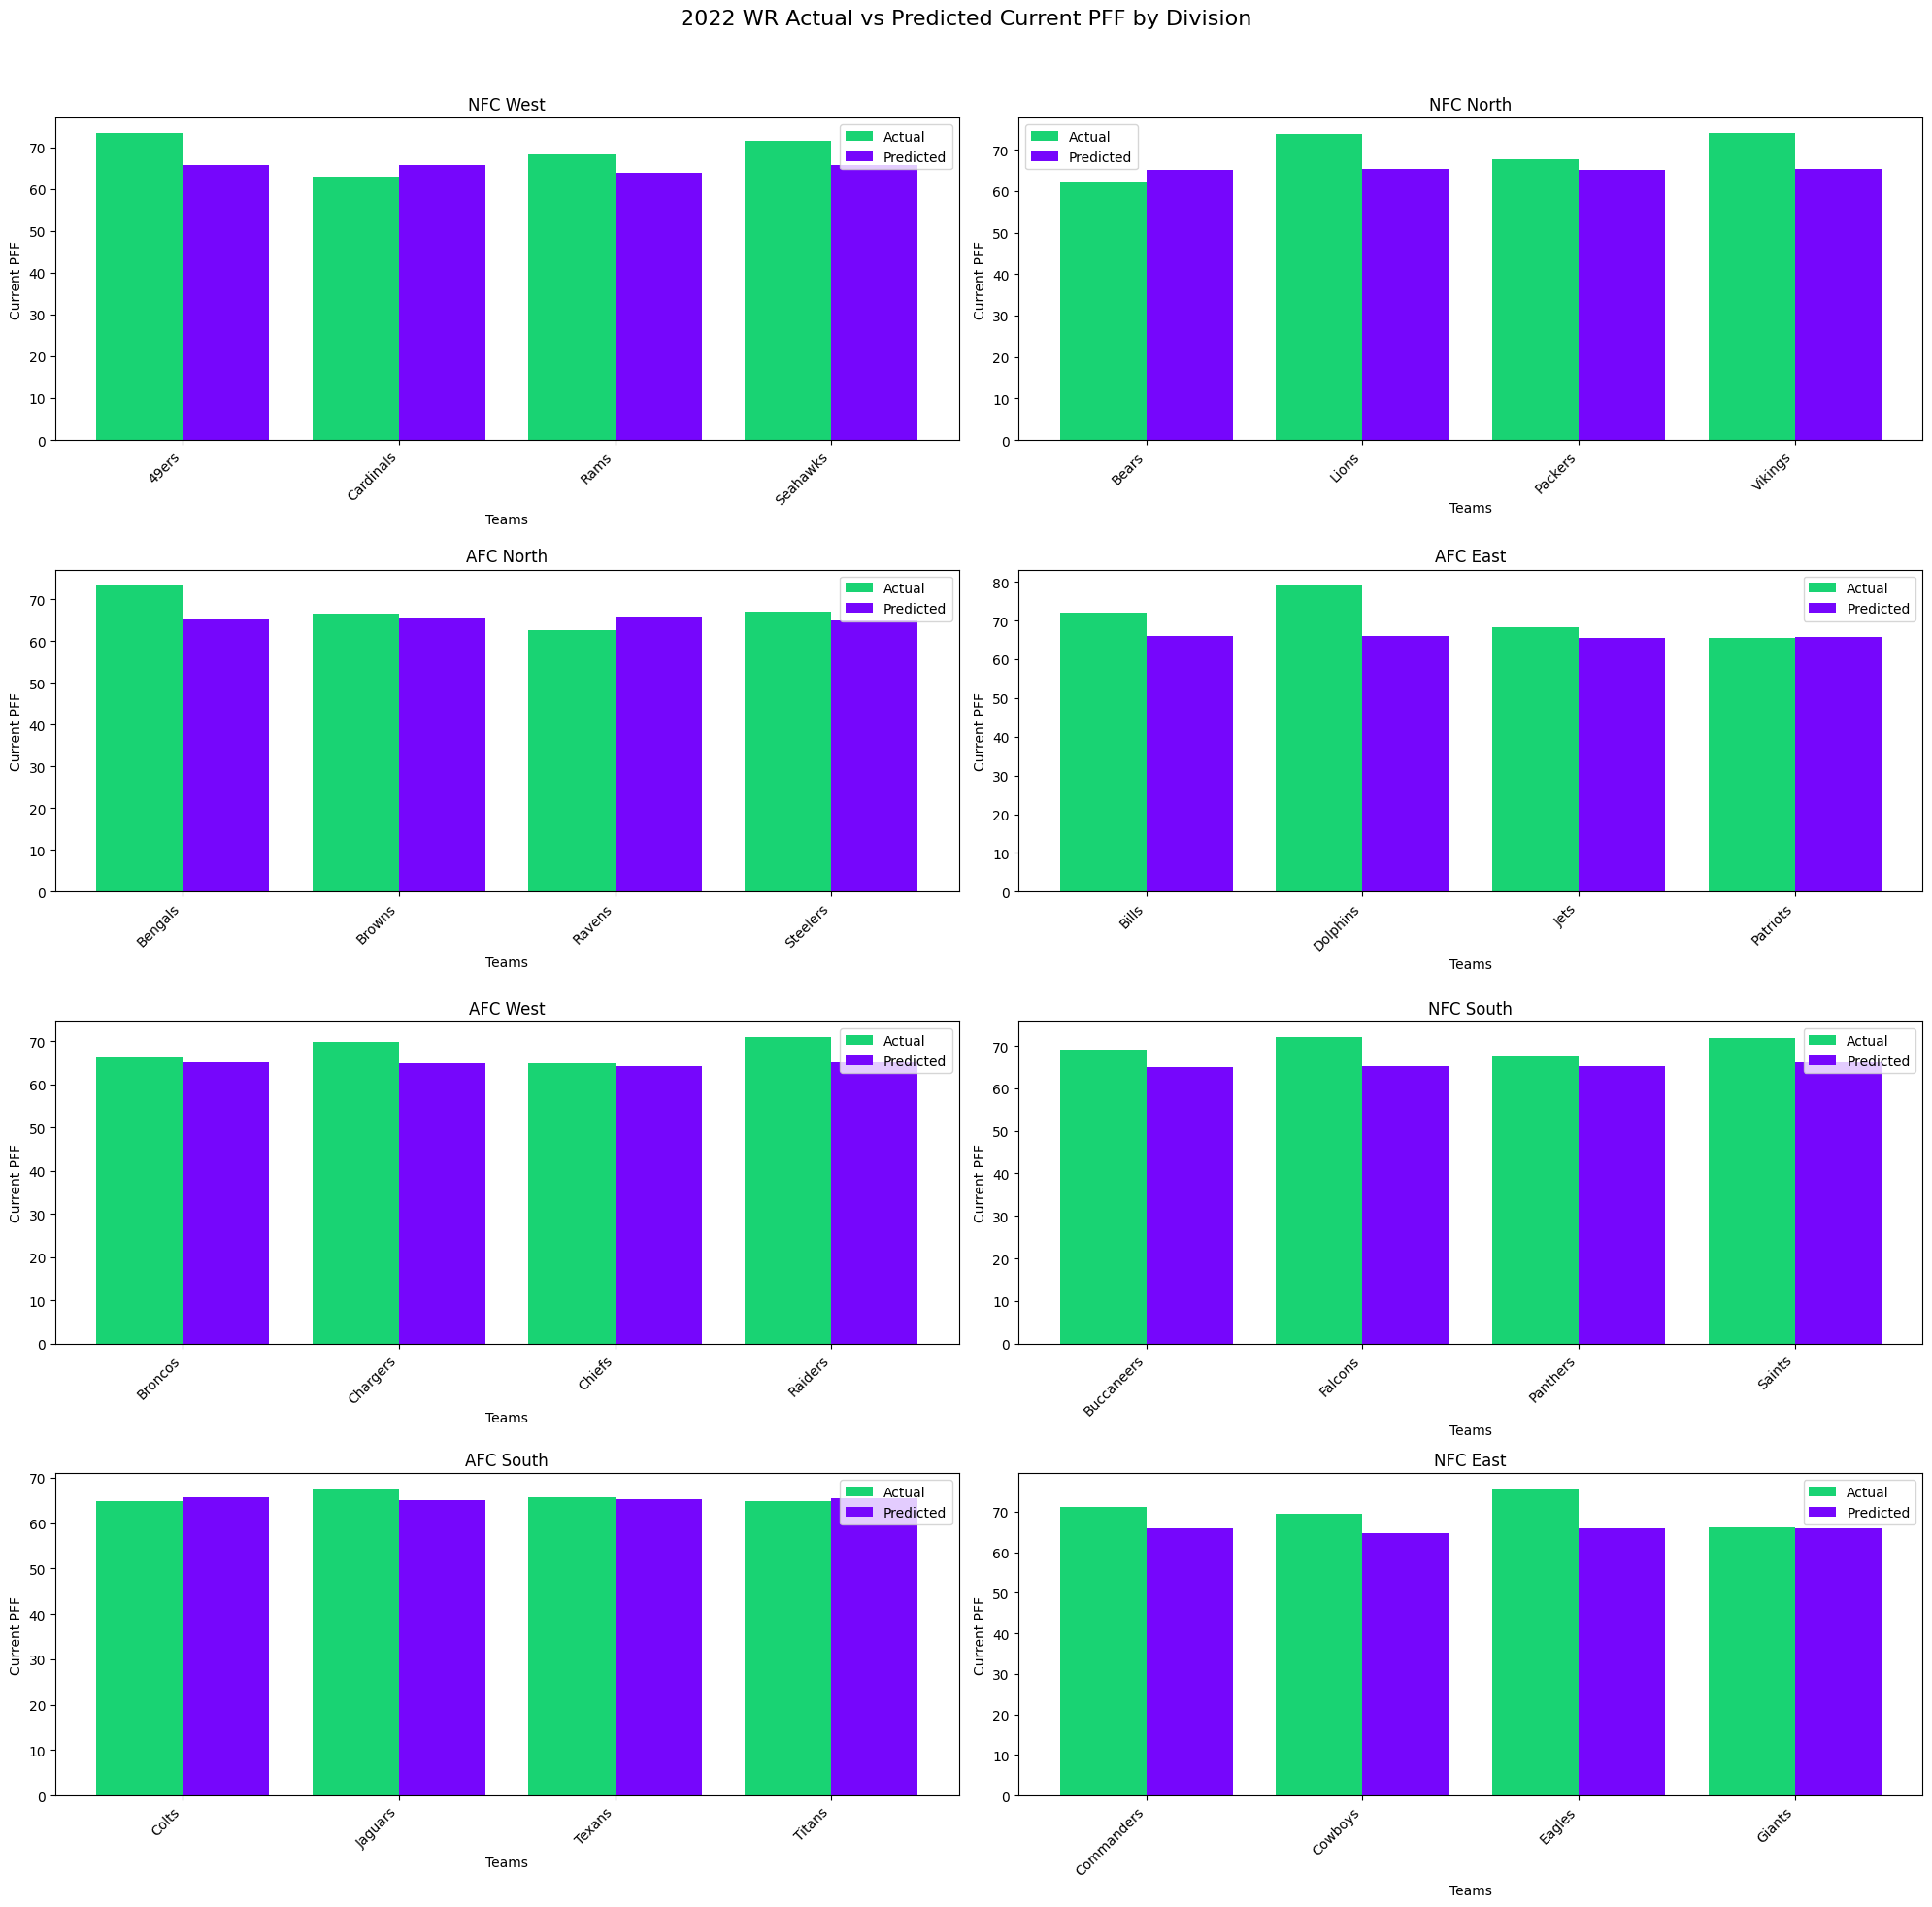

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 51.3687 - val_loss: 20.2444
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 62.2201 - val_loss: 15.6009
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 43.4007 - val_loss: 16.8977
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 69.6137 - val_loss: 16.6796
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 122.5244 - val_loss: 15.4762
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 87.9526 - val_loss: 15.5211
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 70.2162 - val_loss: 15.6875
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 78.0748 - val_loss: 17.5644
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 75.0861 - val_loss: 21.7046
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 67.5060 - val_loss: 17.9133
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 64.6536 - val_loss: 16.2082
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 

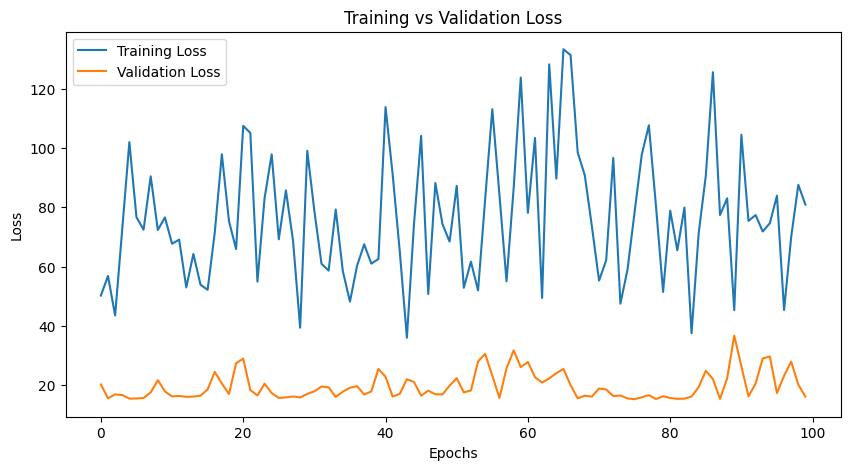

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
R² Score: -0.0004


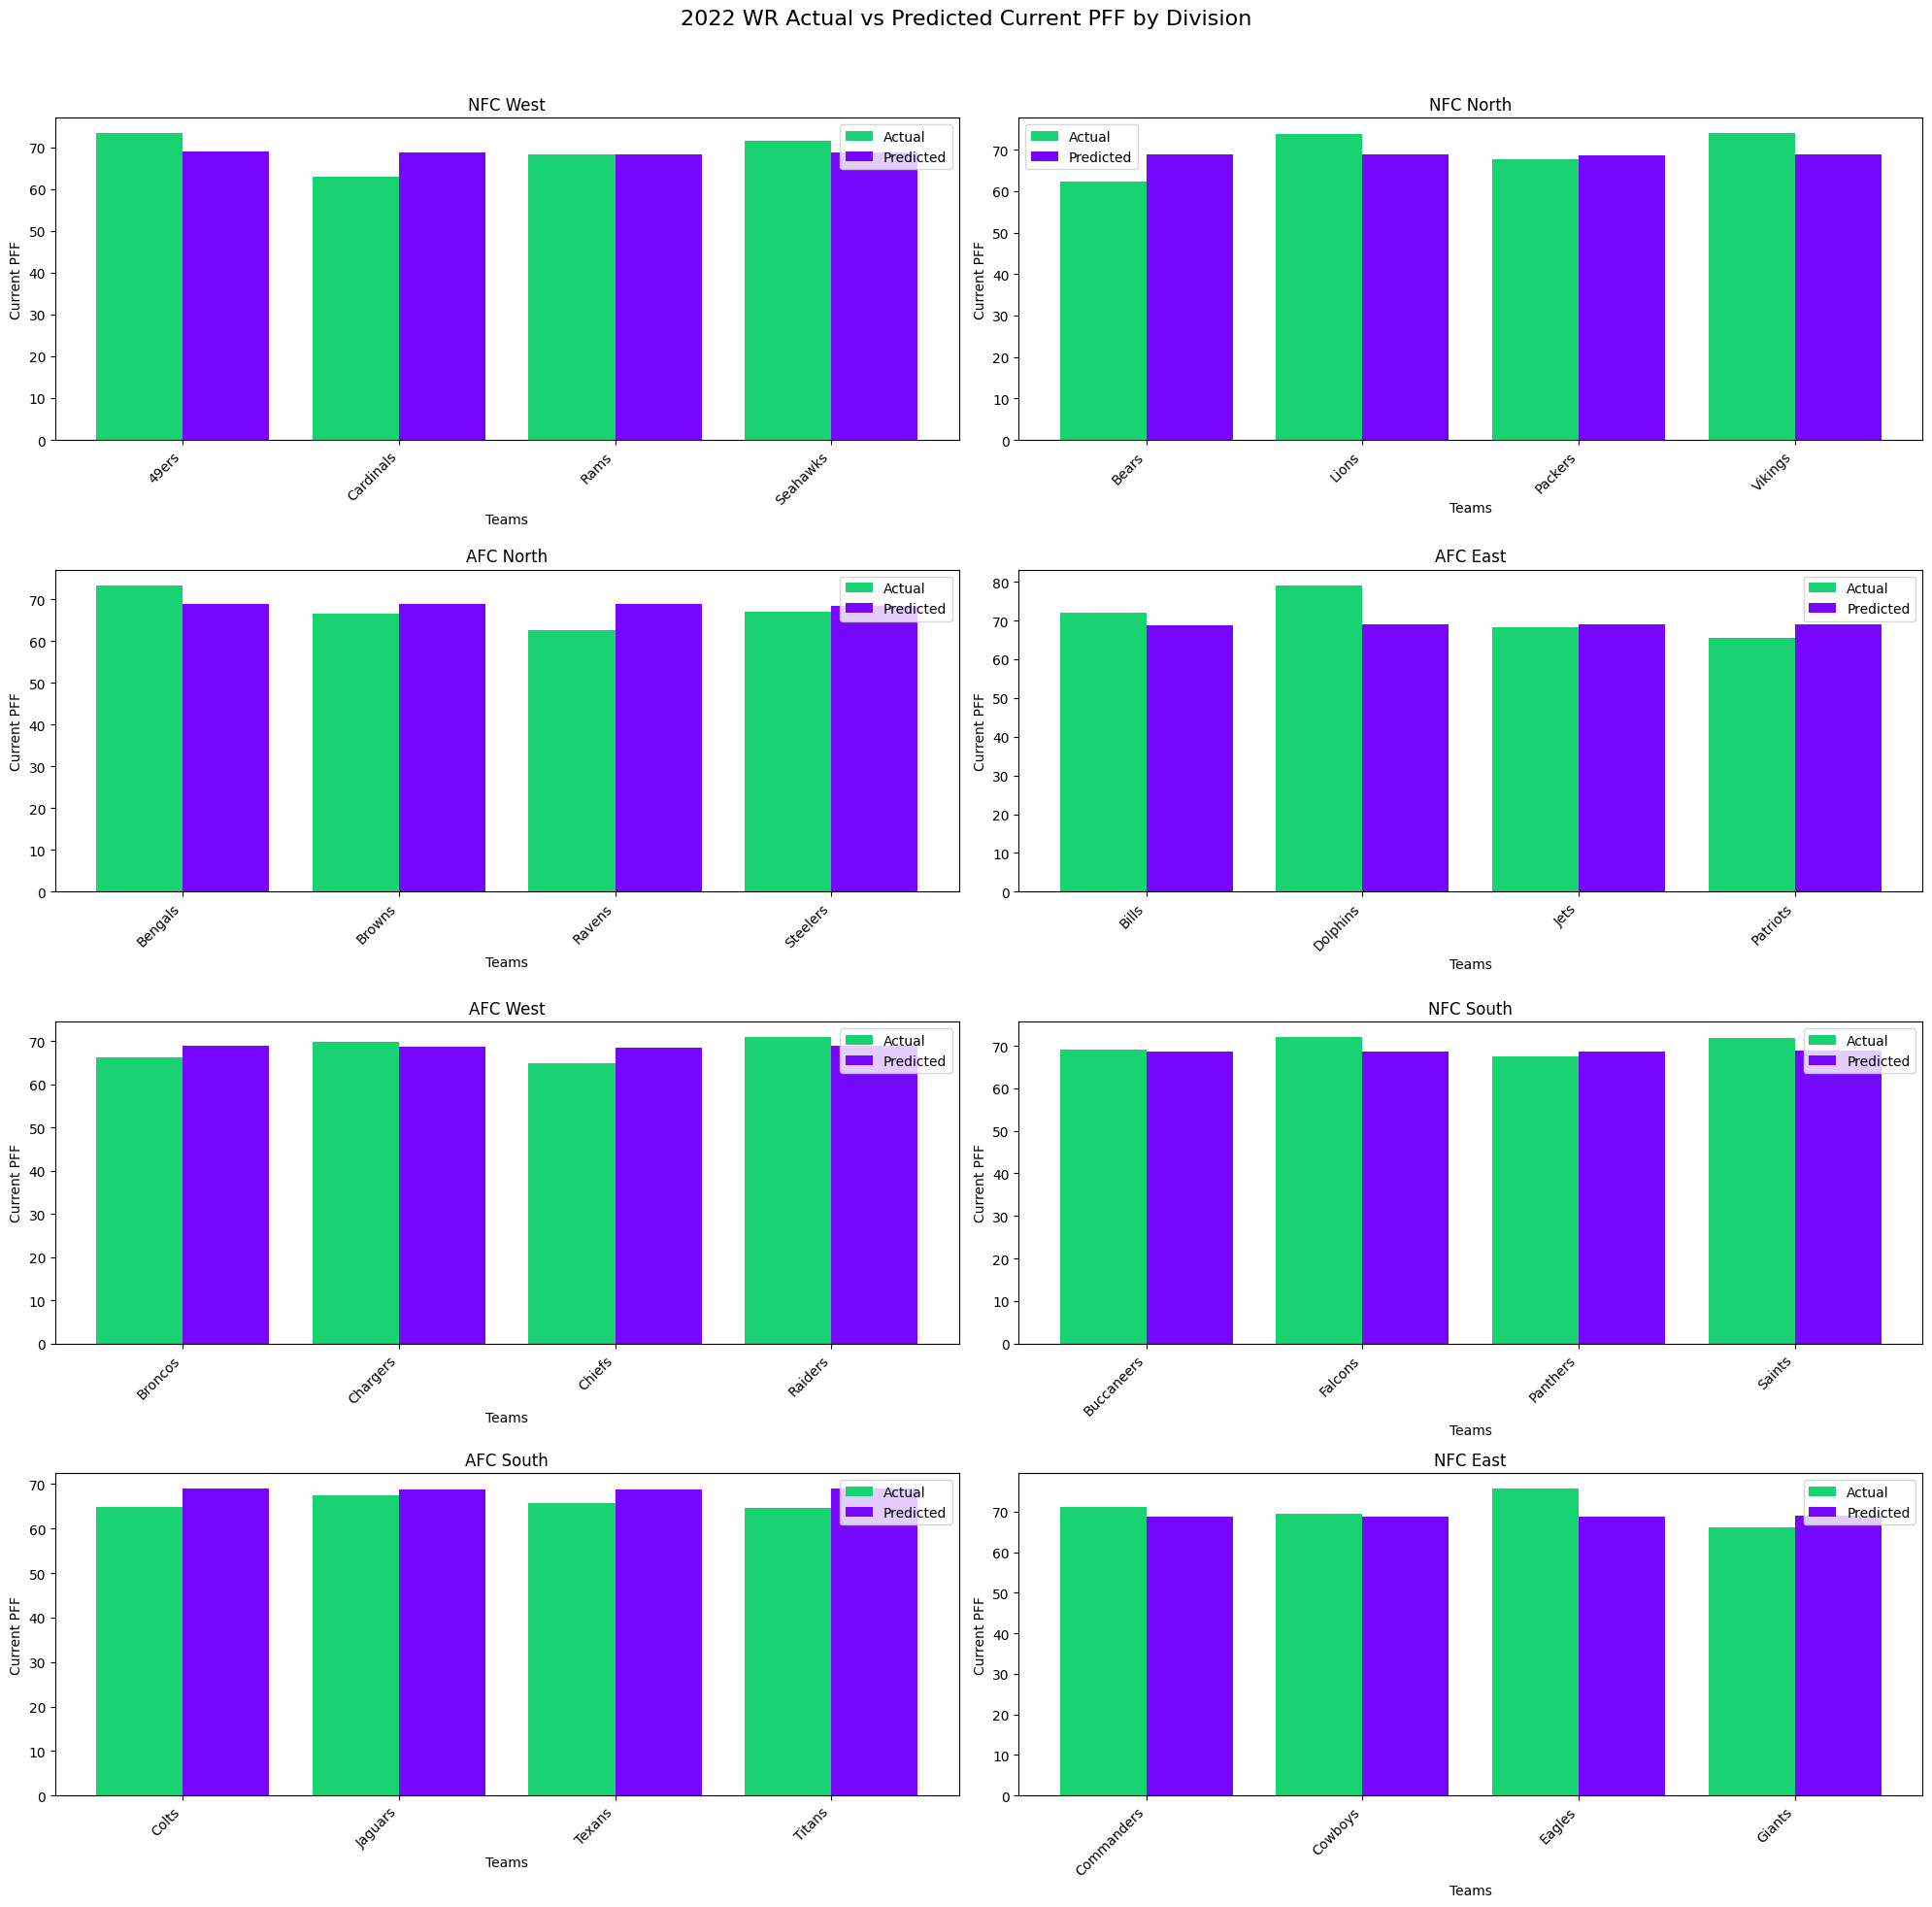

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 70.5461 - val_loss: 17.8426
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.2580 - val_loss: 16.4540
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 49.4554 - val_loss: 16.0851
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 170.0283 - val_loss: 16.9765
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 71.3965 - val_loss: 19.1370
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 75.4264 - val_loss: 17.4257
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 74.3048 - val_loss: 17.0111
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 95.3530 - val_loss: 19.1592
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 80.1419 - val_loss: 21.0992
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 86.8393 - val_loss: 24.6359
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 49.8175 - val_loss: 26.1733
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step 

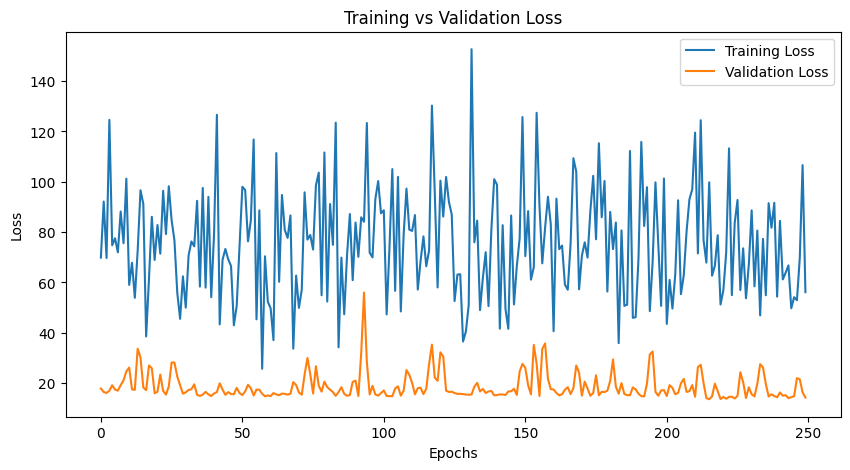

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
R² Score: -0.1083


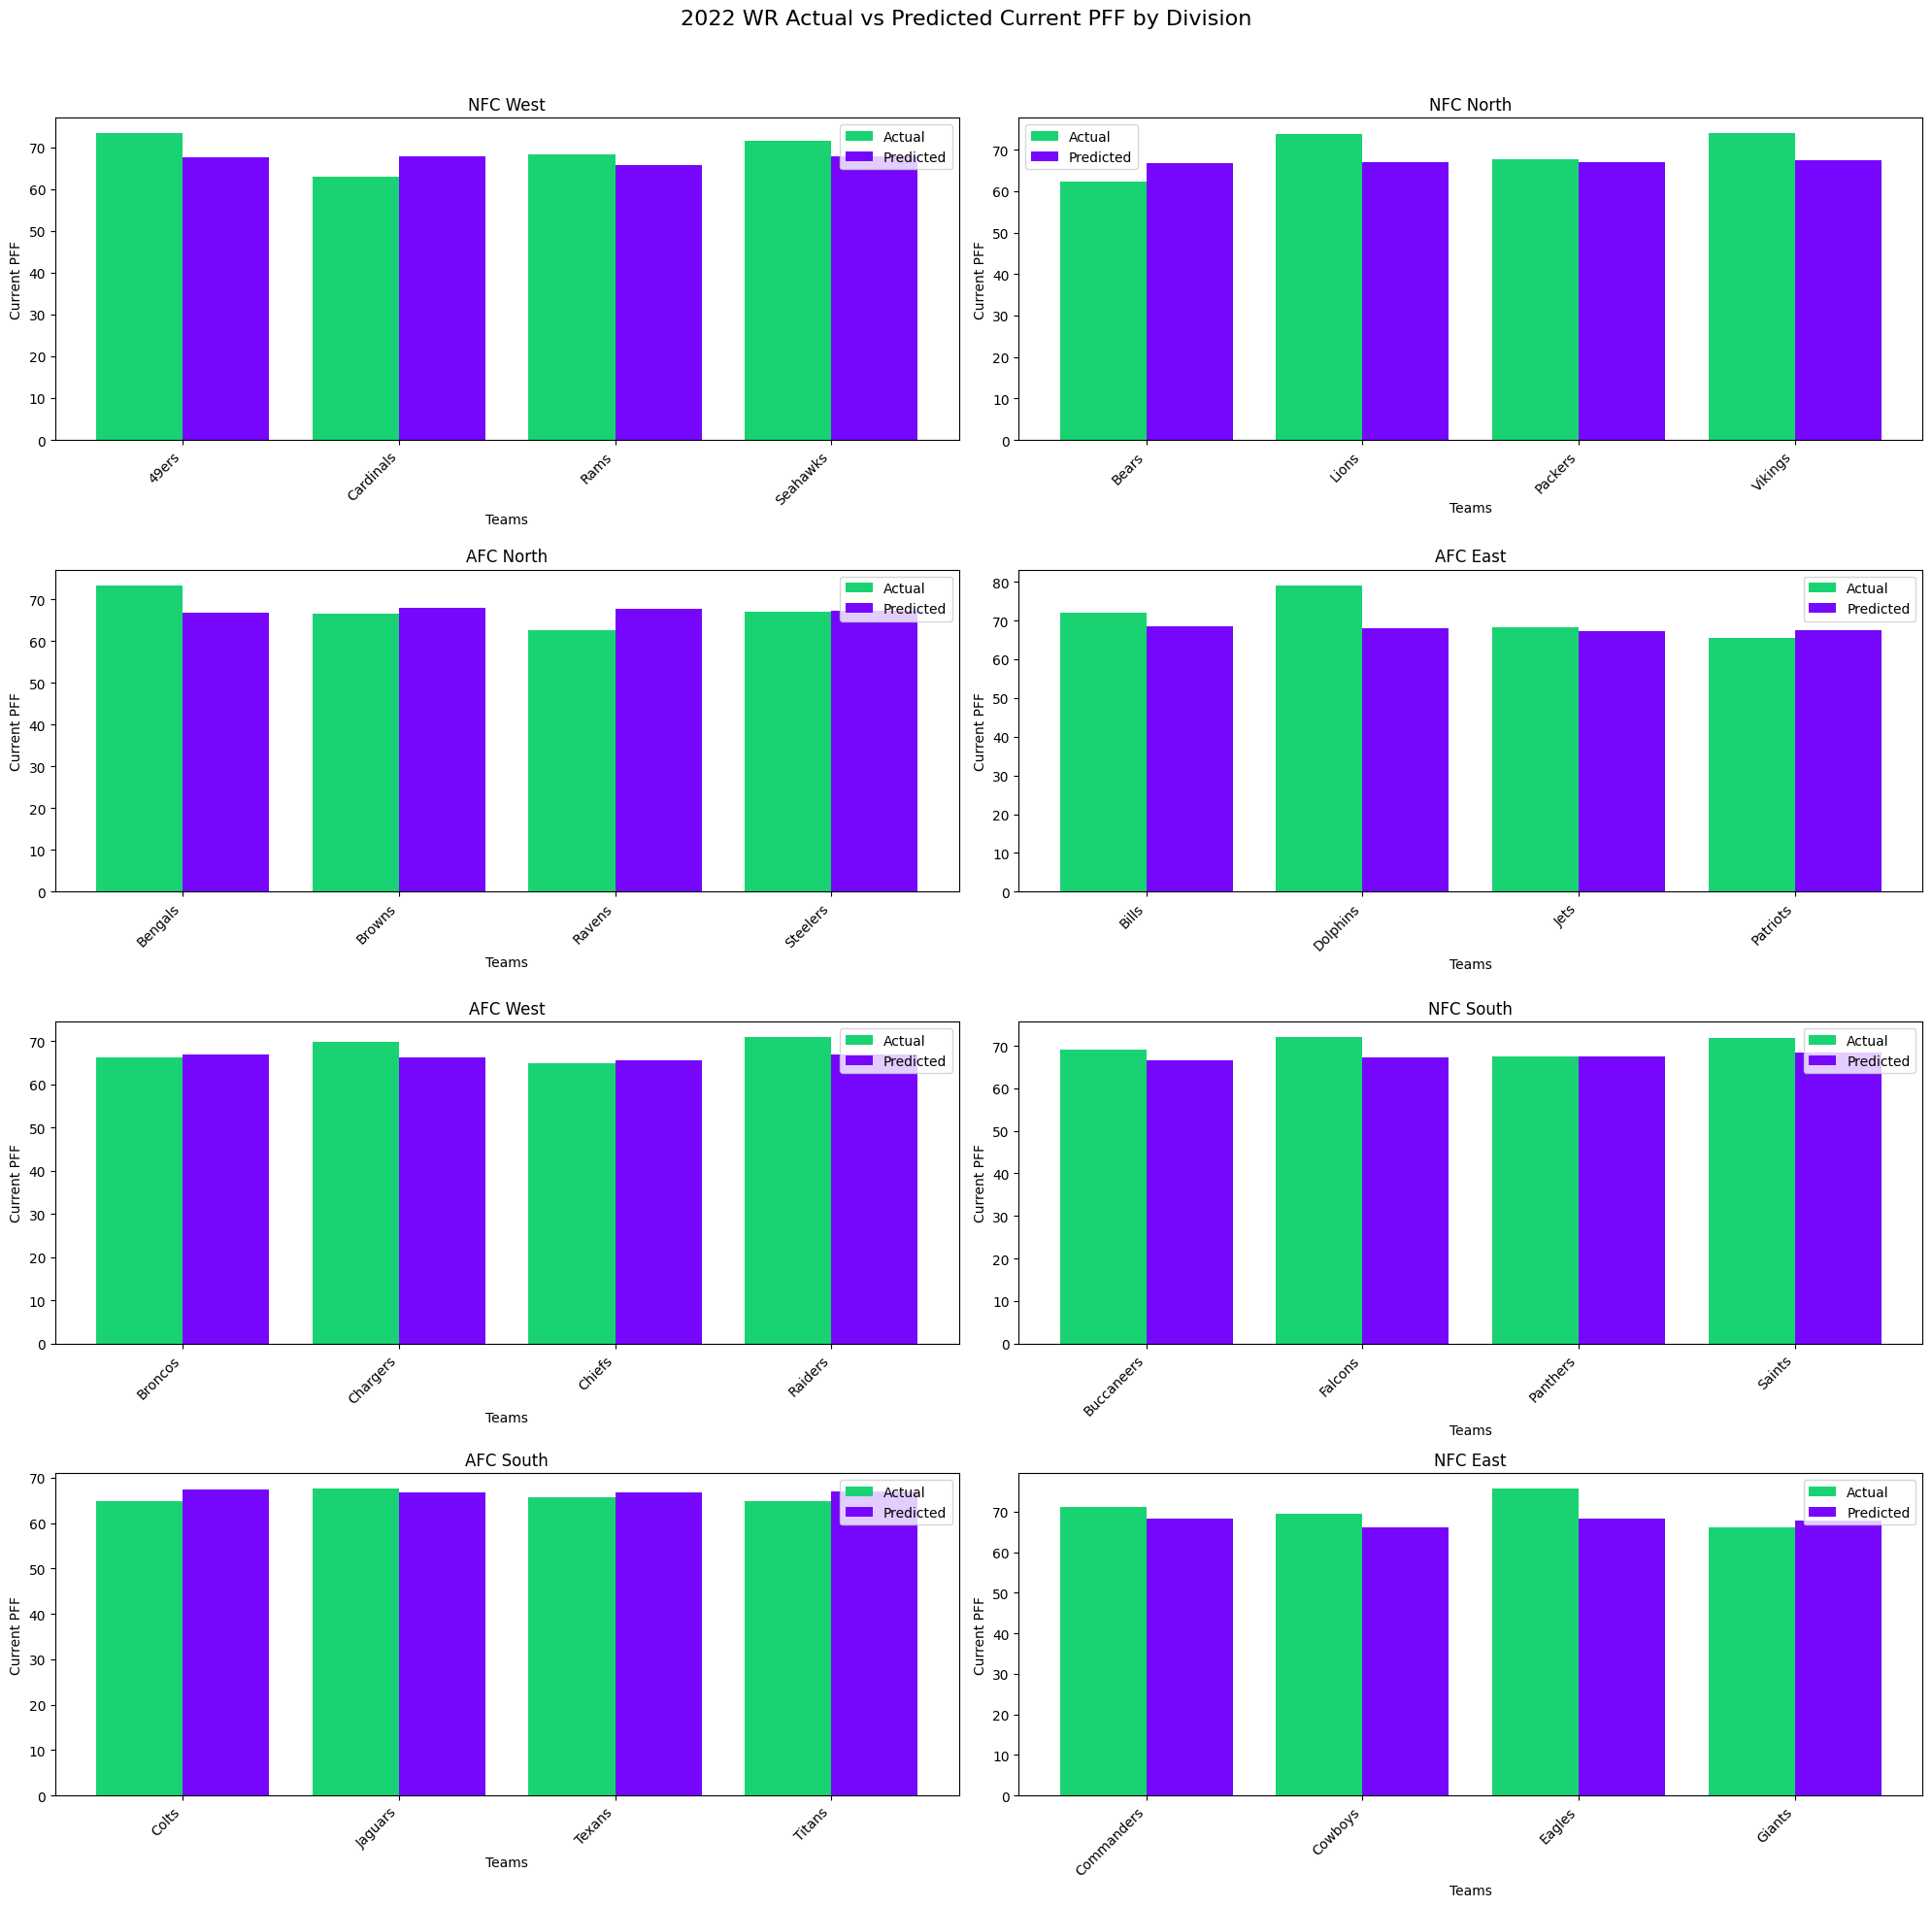

In [262]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    data = df[df['Year'] == 2022].copy()
    data['Predicted_PFF'] = y_pred
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Current_PFF', 'Predicted_PFF', 'Team', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('2022 WR Actual vs Predicted Current PFF by Division', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Current_PFF'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_PFF'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Current PFF')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
    
